In [1]:
from __future__ import nested_scopes
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
display(HTML('<style>.CodeMirror{font-family: "Courier New";font-size: 12pt;}</style>'))
display(HTML('<style>.rendered_html table, .rendered_html td, .rendered_html th {font-size: 20px;}</style>'))


# init

In [3]:
from pathlib import Path
home = str(Path.home())
spark_home=home+"/spark-3.0.0-bin-hadoop2.7"
hadoop_home=home+"/hadoop-2.7.0"
java_home=home+'/jdk1.8.0_212'

In [4]:

import findspark
findspark.init(spark_home)

In [5]:
from __future__ import nested_scopes


In [6]:
import re
import os
import pandas
pandas.set_option('display.max_rows', None)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors
from matplotlib import rcParams
rcParams['font.sans-serif'] =  'Courier New'
rcParams['font.family'] = 'Courier New'
rcParams['font.size'] = '12'
%matplotlib inline

from IPython.display import display,HTML
import threading
import collections

from IPython.display import display
from ipywidgets import IntProgress,Layout
import time
import threading
import gzip

In [7]:
import pyspark
import pyspark.sql
from pyspark.sql import SparkSession
from pyspark.sql.types import (StructType, StructField, DateType,
    TimestampType, StringType, LongType, IntegerType, DoubleType,FloatType)
from pyspark.sql.functions import to_date, floor
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import lit
import time, timeit
from pyspark.storagelevel import StorageLevel
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col


In [8]:
from pyspark.ml import Pipeline
import pandas
import numpy as np


In [9]:
import math
from functools import reduce
import json


In [10]:
from pyspark.sql.types import *
from pyspark.sql import functions as F
from datetime import date


In [11]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext


In [12]:
from datetime import date
from datetime import datetime

In [13]:
from pandasql import sqldf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [14]:
def sync_clocks(nodes):
    !ssh root@127.0.0.1 "/usr/sbin/ntpdate -u 10.0.0.100 2"
    for node in nodes:
        !ssh root@$node "/usr/sbin/ntpdate -u 10.0.0.100 2"

In [15]:
def run_train(train_data, params):
    from sparkxgb import XGBoostClassifier
    t1 = timeit.default_timer()
    print("{} : {}".format("Start time", t1))
    xgboost =  XGBoostClassifier(**params)
    model = xgboost.fit(train_data)
    t2 = timeit.default_timer()
    train_time = t2 - t1
    display(HTML(('Completed training the model. Time(sec): <font size=6pt color=red>{:f}</font>'.format(train_time))))
    #train_data.groupBy(F.spark_partition_id()).count().show(100)
    #print("rows: ",train_data.count())
    return model, train_time

In [16]:
def run_train_regressor(train_data, params):
    from sparkxgb import XGBoostRegressor
    t1 = timeit.default_timer()
    print("{} : {}".format("Start time", t1))
    singlePrecisionHistogram=params['singlePrecisionHistogram']
    del params['singlePrecisionHistogram']
    xgboost =  XGBoostRegressor(**params)
    xgboost._java_obj.setSinglePrecisionHistogram(singlePrecisionHistogram)
    model = xgboost.fit(train_data)
    t2 = timeit.default_timer()
    train_time = t2 - t1
    display(HTML(('Completed training the model. Time(sec): <font size=6pt color=red>{:f}</font>'.format(train_time))))
    return model, train_time

In [17]:
#%env http_proxy=
#%env https_proxy=
#import pyhdfs
#fs = pyhdfs.HdfsClient(hosts='10.0.2.125:50070', user_name='yuzhou')


In [18]:
import socket
localhost=socket.gethostname()


In [19]:


basedif="aws_c5"

emon_events='''
    -q -c -experimental -t0.5 -l100000 -u
    -C (

    INST_RETIRED.ANY
    CPU_CLK_UNHALTED.REF_TSC
    CPU_CLK_UNHALTED.THREAD
    CYCLE_ACTIVITY.STALLS_L3_MISS
    CYCLE_ACTIVITY.CYCLES_MEM_ANY
    CYCLE_ACTIVITY.STALLS_TOTAL
    DTLB_LOAD_MISSES.WALK_ACTIVE
    UNC_CHA_TOR_OCCUPANCY.IA_MISS:filter1=0x40432
    UNC_CHA_TOR_INSERTS.IA_MISS:filter1=0x40432
    UNC_CHA_CLOCKTICKS
    UNC_M_CAS_COUNT.RD
    UNC_M_CAS_COUNT.WR
    UNC_IIO_DATA_REQ_OF_CPU.MEM_WRITE.PART0
    UNC_IIO_DATA_REQ_OF_CPU.MEM_READ.PART0
    UNC_IIO_DATA_REQ_BY_CPU.MEM_WRITE.PART0
    UNC_IIO_DATA_REQ_BY_CPU.MEM_READ.PART0


    INST_RETIRED.ANY
    CPU_CLK_UNHALTED.REF_TSC
    CPU_CLK_UNHALTED.THREAD
    OFFCORE_RESPONSE:request=ALL_READS:response=L3_MISS.ANY_SNOOP:ocr_msr_val=0x3fB80007f7
    OFFCORE_RESPONSE:request=ALL_READS:response=L3_MISS.ANY_SNOOP:ocr_msr_val=0x3f840007f7
    MEM_LOAD_RETIRED.L3_MISS
    UOPS_ISSUED.STALL_CYCLES
    UNC_CHA_TOR_OCCUPANCY.IA_MISS:filter1=0x40431
    UNC_CHA_TOR_INSERTS.IA_MISS:filter1=0x40431
    UNC_CHA_CLOCKTICKS
    )
'''

def killsar(clients):
    for l in clients:
        out=!ssh $l "ps aux | grep -w sar | grep -v grep | tr -s ' ' | cut -d' ' -f2"
        for x in out:
            !ssh $l "kill $x > /dev/null 2>&1"
    for l in clients:
        out=!ssh $l "ps aux | grep -w pidstat | grep -v grep | tr -s ' ' | cut -d' ' -f2"
        for x in out:
            !ssh $l "kill $x > /dev/null 2>&1"
    for l in clients:
        out=!ssh $l "ps aux | grep -w perf | grep -v grep | tr -s ' ' | cut -d' ' -f2"
        for x in out:
            !ssh root@$l "kill $x > /dev/null 2>&1"
    for l in clients:
        out=!ssh $l "ps aux | grep -w nvidia-smi | grep -v grep | tr -s ' ' | cut -d' ' -f2"
        for x in out:
            !ssh $l "kill $x > /dev/null 2>&1"
    for l in clients:
        !ssh $l "source ~/sep_installed/sep_vars.sh>/dev/null 2>&1; emon -stop > /dev/null 2>&1"
            
def startmonitor(clients,appid,**kwargs):
    local_profile_dir=home+"/profile/"
    prof=local_profile_dir+appid+"/"
    !mkdir -p $prof
    !echo "" > /tmp/training_time
    
#    for l in clients:
#        !ssh $l date
    
    killsar(clients)
    
    if kwargs.get("collect_emon",False):
        with open(home+"/emon.list",'w+') as f:
            f.write(emon_events)
        for l in clients:
            !scp {home}/emon.list {l}:{home}/emon.list  > /dev/null 2>&1
    
    perfsyscalls=kwargs.get("collect_perf_syscall",None)
    
    for l in clients:
        !mkdir -p $prof/$l/
        !ssh $l mkdir -p $prof/$l/
        !ssh $l "sar -o {prof}/{l}/sar.bin -r -u -d -n DEV 1 >/dev/null 2>&1 &"
        if kwargs.get("collect_pid",False):
            !ssh $l "{java_home}/bin/jps | grep CoarseGrainedExecutorBackend | head -n 1 | cut -d' ' -f 1 | xargs  -I % pidstat -h -t -p % 1  > {prof}/{l}/pidstat.out  2>/dev/null &"
        !ssh root@{l} 'cat /proc/uptime  | cut -d" " -f 1 | xargs -I ^ date -d "- ^ seconds"  +%s.%N' > $prof/$l/uptime.txt
        if kwargs.get("collect_sched",False):
            !ssh root@{l} 'perf trace -e "sched:sched_switch" -C 8-15 -o {prof}/{l}/sched.txt -T -- sleep 10000 >/dev/null 2>/dev/null &'
        if kwargs.get("collect_emon",False):
            !ssh {l} "source ~/sep_installed/sep_vars.sh>/dev/null 2>&1; emon -i {home}/emon.list -f {prof}/{l}/emon.rst >/dev/null 2>&1 & "
        if perfsyscalls is not None:
            !ssh root@{l} "perf stat -e 'syscalls:sys_exit_poll,syscalls:sys_exit_epoll_wait' -a -I 1000 -o {prof}/{l}/perfstat.txt  >/dev/null 2>&1 & "
        if kwargs.get("collect_nv_smi",False):
            !ssh {l} "nvidia-smi --query-gpu=timestamp,index,utilization.gpu,utilization.memory,memory.used, -lms 500  --format=csv -f  {prof}/{l}/gpu.txt >/dev/null 2>&1 & "
    return prof

def stopmonitor(clients, sc, appid,**kwargs):
    %cd ~
    
    local_profile_dir=home+"/profile/"
    prof=local_profile_dir+appid+"/"
    !mkdir -p $prof
    
    killsar(clients)
    
    for l in clients:
        !ssh $l "sar -f {prof}/{l}/sar.bin -r > {prof}/{l}/sar_mem.sar;sar -f {prof}/{l}/sar.bin -u > {prof}/{l}/sar_cpu.sar;sar -f {prof}/{l}/sar.bin -d > {prof}/{l}/sar_disk.sar;sar -f {prof}/{l}/sar.bin -n DEV > {prof}/{l}/sar_nic.sar;" 
        !ssh $l "grep -rI xgbtck --no-filename {hadoop_home}/logs/userlogs/{appid}/* | sed 's/^ //g'  > {prof}/{l}/xgbtck.txt"
        if l!= socket.gethostname():
            !scp -r $l:$prof/$l $prof/ > /dev/null 2>&1
        !ssh $l "{java_home}/bin/jps | grep CoarseGrainedExecutorBackend | head -n 2 | tail -n 1 | cut -d' ' -f 1  | xargs -I % ps -To tid p %" > {prof}/{l}/sched_threads.txt
        !ssh $l "source ~/sep_installed/sep_vars.sh>/dev/null 2>&1; emon -v " > $prof/$l/emonv.txt
        !ssh $l "sar -V " > $prof/$l/sarv.txt
        !test -f $prof/$l/perfstat.txt && head -n 1 $prof/$l/perfstat.txt > $prof/$l/perfstarttime
    if sc is not None:
        sc.stop()
    
    xgbfiles=!find {home}/profile/{appid} | grep xgbtck
    !cat /tmp/training_time >> {xgbfiles[0]}
    
    !{hadoop_home}/bin/hadoop fs -copyToLocal /tmp/sparkEventLog/$appid $prof/app.log
#    !cp {home}/spark_events/{appid}  $prof/app.log
#    fs.mkdirs(f"/{basedif}/")
#    v=[os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(local_profile_dir+appid)) for f in fn]
#    for f in v:
#        paths=os.path.split(f)
#        fs.mkdirs("/"+basedif+"/"+paths[0][len(local_profile_dir):])
#        fs.copy_from_local(f,"/"+basedif+"/"+paths[0][len(local_profile_dir):]+"/"+paths[1],overwrite=True)
#    !HADOOP_USER_NAME=yuzhou hadoop fs -put  file://{prof} hdfs://10.1.2.125:8020/{basedif}
    print('http://localhost:28080/history/{:s}/jobs'.format(appid))
    print('http://sr525:28080/history/{:s}/jobs'.format(appid))
    print('http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/{:s}.json'.format(appid))
    print(appid)

In [20]:
def pinexecutor(clients):
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        t=[l for l in range(0,cores_per_executor)]
        for l in pids:
            cpus=','.join(map(str, t))
            for i in range(0,cores_per_executor):
                t[i]=t[i]+cores_per_executor
            !ssh $client "taskset -a -p -c $cpus $l > /dev/null 2>&1 "


In [21]:
total_cores=48
def pinexecutor_soc(clients):
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        if len(pids) % 2 !=0:
            print("pin executor soc must have 2x executors, now created, ",len(pids))
            return
        
        soc=0
        soc0=list(range(0,cores_per_executor))
        soc1=list(range(int(total_cores/2),int(total_cores/2)+cores_per_executor))
        for l in pids:
            target_cpus=soc0 if soc==0 else soc1
            cpus=','.join(map(str, target_cpus))
            soc=(soc+1)%2
            !ssh $client "taskset -a -p -c $cpus $l > /dev/null 2>&1 "
            print(f"taskset -a -p -c {cpus} {l}")
            for i in range(0,cores_per_executor):
                target_cpus[i]=target_cpus[i]+cores_per_executor


In [22]:
total_cores=48
def numabound(clients):
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        soc=0
        soc0=range(0,int(total_cores/2))
        soc1=range(int(total_cores/2),total_cores)
        for l in pids:
            target_cpus=soc0 if soc==0 else soc1
            cpus=','.join(map(str, target_cpus))
            soc=(soc+1)%2
            !ssh $client "taskset -a -p -c $cpus $l > /dev/null 2>&1 "
            

In [23]:
total_cores=48
def numabound_smt(clients):
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        soc=0
        soc0=list(range(0,int(total_cores/2)))
        soc1=list(range(int(total_cores/2),total_cores))
        soc2=list(range(total_cores,total_cores+int(total_cores/2)))
        soc3=list(range(total_cores+int(total_cores/2),2*total_cores))        
        for l in pids:
            target_cpus=soc0+soc2 if soc==0 else soc1+soc3
            cpus=','.join(map(str, target_cpus))
            soc=(soc+1)%2
            print(l,cpus)
            !ssh $client "taskset -a -p -c $cpus $l > /dev/null 2>&1 "
            
    

In [24]:
def fixfreq(clients, freq):
    freqstr="0x"+hex(int(freq*10))[2:]*8
    for client in clients:
        !ssh root@$client "emon --write-msr 0x1ad=$freqstr > /dev/null"

In [25]:
def gettrainingtime(clients, appid):
    xgbtck=[]
    for l in clients:
        o=!ssh $l "cd {home}/hadoop-2.7.0/logs/userlogs/{appid}/; grep xgbtck */stdout"
        xgbtck.extend(o)
    if len(xgbtck)==0:
        return
    xgbtck=[l.split(" ") for l in xgbtck]
    begins=[int(l[3]) for l in xgbtck if l[1]=="begin"]
    end=[int(l[3]) for l in xgbtck if l[1]=="end"]
    trainingtime=max([(l[1]-l[0])/1000 for l in list(zip(begins,end))])
    display(HTML(('Training Time(sec): <font size=6pt color=red>{:f}</font>'.format(trainingtime))))
    

In [26]:
def draw_allreduce(appid):
    xgbtck=[]
    for l in clients:
        o=!ssh $l "cd {home}/hadoop-2.7.0/logs/userlogs/{appid}/; grep xgbtck */stdout"
        xgbtck.extend(o)
    if len(xgbtck)==0:
        return
    out=[l.split(" ") for l in xgbtck if "allreduce" in l]
    pds=pandas.DataFrame(out)
    pds.columns=['t','n','rank','time','elapsed',"callcnt",'msg']
    pdsx=pds.astype({'rank': 'int32','time':'float','elapsed':"float","callcnt":"int32","msg":"int32"})
    pdsx['msg/cnt']=pdsx['msg'] /pdsx['callcnt']

    pdp=sqldf("select * from pdsx where rank=0")
    pdp.plot(x="time",y=['elapsed'],figsize=(30,8))
    pdp.plot(x="time",y=['callcnt'],figsize=(30,8))
    pdp.plot(x="time",y=['msg/cnt'],figsize=(30,8))

    ags=sqldf("select rank,sum(callcnt) as callcnt,sum(elapsed) as elapsed ,avg(`msg/cnt`) as msg_cnt from pdsx group by rank")
    ags.plot.bar(x='rank',y="elapsed",figsize=(30,8))
    ags.plot.bar(x='rank',y="msg_cnt",figsize=(30,8))

In [27]:
def dropcache(clients):
    for l in clients:
        !ssh root@$l "sync && echo 3 > /proc/sys/vm/drop_caches; free -h"
        

In [29]:
clients='''172.31.61.15 
172.31.53.191 
172.31.49.204 
172.31.61.221 
172.31.57.201 
172.31.54.28 
172.31.54.196 
172.31.63.132'''.split()

In [30]:
clients

['172.31.61.15',
 '172.31.53.191',
 '172.31.49.204',
 '172.31.61.221',
 '172.31.57.201',
 '172.31.54.28',
 '172.31.54.196',
 '172.31.63.132']

In [31]:
def plotresult(aslavenode, appid, numRound=100):
    out=!ssh {aslavenode} 'cat {home}/hadoop-2.7.0/logs/userlogs/{appid}/*/stderr'
    li=parse_out(out)
    max50pd=pandas.DataFrame(li)
    max50pd.columns=['extranode','prune','max_depth','time']
    max50pd.plot(x='time',y="extranode",figsize=(30,8))
    max50pd.iloc[0:numRound].plot(y="extranode",figsize=(30,8))
    max50pd.iloc[0:numRound].plot(y="max_depth",figsize=(30,8))

In [32]:
def parse_out(out):
    sparkout=[l.strip().split(" ") for l in out if "max_depth" in l]
    sparkout=[[int(l[6]),int(l[9]),int(l[12].split("=")[1]),datetime.strptime(l[0],"[%H:%M:%S]")] for l in sparkout]
    return sparkout

In [33]:
!aws s3 sync s3://mlp-spark-dataset-bucket/jars-for-aws-cpu {home}/jars-for-aws-cpu

In [34]:
!ls {home}/jars-for-aws-cpu/

1.3  arrow  sparkxgb_1.23.zip


In [35]:
sparkeventLogdir = f'hdfs://{localhost}/tmp/sparkEventLog'
sparkxgbpathname = f'{home}/jars-for-aws-cpu/sparkxgb_1.23.zip'

In [36]:
jars=!ls -d {home}/jars-for-aws-cpu/arrow/*.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars ' + ','.join(jars) + ' pyspark-shell'
%env PYSPARK_SUBMIT_ARGS

'--jars /home/sparkuser/jars-for-aws-cpu/arrow/spark-arrow-datasource-0.9.0-jar-with-dependencies.jar,/home/sparkuser/jars-for-aws-cpu/arrow/xgboost4j-spark_2.12-1.3.3.jar,/home/sparkuser/jars-for-aws-cpu/arrow/xgboost4j_2.12-1.3.3.jar pyspark-shell'

In [37]:
sparkarrowdsjar = 'spark-arrow-datasource-0.9.0-jar-with-dependencies.jar'
sparkarrowdsjarpath = f'{home}/jars-for-aws-cpu/arrow/' + sparkarrowdsjar

In [38]:
def create_cntx(nodes, executors_per_node, cores_per_executor, str_appname):

    
    executor_memory = max(int(math.floor(nodes*total_size/(nodes*executors_per_node)))-1024-int(math.floor(cache_size*1024/(nodes*executors_per_node))), 1000)
    offheap = max(int(math.floor(cache_size*1024/(nodes*executors_per_node))), 2000)

    
    print('executor per node: {:d}\nparallelism: {:d}\nmemory: {:d}m\noffheap:{:d}m'.format(executors_per_node,nodes*executors_per_node*cores_per_executor,executor_memory,offheap))
    
    
    conf = (SparkConf()
        .set('spark.default.parallelism', '{:d}'.format(nodes*executors_per_node*cores_per_executor))
        .set('spark.sql.files.maxPartitionBytes', '500m')      # key setting for arrow loading patch !!!
        .set('spark.sql.join.preferSortMergeJoin','False')
        .set('spark.sql.parquet.columnarReaderBatchSize', '102400')
        .set('spark.sql.codegen.wholeStage', 'false')
        .set('spark.app.name', str_appname)
        .set('spark.rdd.compress', 'False')
        .set('spark.serializer','org.apache.spark.serializer.KryoSerializer')
        .set('spark.driver.memory','48g')
        .set('spark.executor.instances', '{:d}'.format(executors_per_node*nodes))
        .set('spark.executor.cores','{:d}'.format(cores_per_executor))
        .set('spark.executor.memory', '{:d}m'.format(executor_memory))
        .set('spark.executor.memoryOverhead','1g')    # 10g is known good for 1321mx46 dataset.
        .set('spark.task.cpus','1')      # key setting for arrow loading patch !!!
        .set('spark.memory.offHeap.enabled','True')
        .set('spark.memory.offHeap.size','{:d}m'.format(offheap))
        .set('spark.memory.storageFraction','0.5')
        .set('spark.executor.extraJavaOptions',\
            '-XX:+UseParallelGC -XX:+UseParallelOldGC -verbose:gc -XX:+PrintGCDetails -XX:+PrintGCTimeStamps')
        .set('spark.executorEnv.rabit_reduce_ring_mincount',10<<20)
        .set('spark.eventLog.enabled', 'True')
        .set('spark.eventLog.dir',sparkeventLogdir)
        .set('spark.driver.maxResultSize', 0)
        .set('spark.resourceProfile.executorReuse', 'True')
        .set('spark.dynamicAllocation.enabled', 'True')
        .set('spark.shuffle.service.enabled', 'False')
        .set('spark.dynamicAllocation.shuffleTracking.enabled', 'True')
        .set('spark.dynamicAllocation.exeutorIdleTimeout','10000')
        .set('spark.dynamicAllocation.minExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.dynamicAllocation.maxExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.dynamicAllocation.initialExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.driver.extraClassPath', sparkarrowdsjarpath)
        .set('spark.executor.extraClassPath', './'+sparkarrowdsjar)
        .set('xgboost.spark.arrow.optimization.enabled', 'True')
        .set('spark.sql.parquet.columnarReaderBatchSize', '102400')
        .set('spark.locality.wait',0)
        .setMaster('yarn')
        )

    sc = SparkContext(conf=conf,master='yarn')
    sc.setLogLevel('INFO')
    spark = SQLContext(sc)
    sc.addPyFile(sparkxgbpathname)
    time.sleep(10)
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        print(client,":",len(pids)," ","\t".join(map(str,pids)))

    return sc, spark

In [39]:
def create_cntx_vanilla(nodes, executors_per_node, cores_per_executor, str_appname):

    
    executor_memory = max(int(math.floor(nodes*total_size/(nodes*executors_per_node)))-1024-int(math.floor(cache_size*1024/(nodes*executors_per_node))), 1000)
    offheap = max(int(math.floor(cache_size*1024/(nodes*executors_per_node))), 2000)

    
    print('executor per node: {:d}\nparallelism: {:d}\nmemory: {:d}m\noffheap:{:d}m'.format(executors_per_node,nodes*executors_per_node*cores_per_executor,executor_memory,offheap))
   
    
    
    conf = (SparkConf()
        .set('spark.default.parallelism', '{:d}'.format(nodes*executors_per_node*cores_per_executor))
        .set('spark.sql.files.maxPartitionBytes', '500m')      # key setting for arrow loading patch !!!
        .set('spark.sql.join.preferSortMergeJoin','False')
        .set('spark.sql.parquet.columnarReaderBatchSize', '102400')
        .set('spark.sql.codegen.wholeStage', 'false')
        .set('spark.app.name', str_appname)
        .set('spark.rdd.compress', 'False')
        .set('spark.serializer','org.apache.spark.serializer.KryoSerializer')
        .set('spark.driver.memory','48g')
        .set('spark.executor.instances', '{:d}'.format(executors_per_node*nodes))
        .set('spark.executor.cores','{:d}'.format(cores_per_executor))
        .set('spark.executor.memory', '{:d}m'.format(executor_memory))
        .set('spark.executor.memoryOverhead','1g')    # 10g is known good for 1321mx46 dataset.
        .set('spark.task.cpus',cores_per_executor)      # key setting for arrow loading patch !!!
        .set('spark.memory.offHeap.enabled','True')
        .set('spark.memory.offHeap.size','{:d}m'.format(offheap))
        .set('spark.memory.storageFraction','0.5')
        .set('spark.executor.extraJavaOptions',\
            '-XX:+UseParallelGC -XX:+UseParallelOldGC -verbose:gc -XX:+PrintGCDetails -XX:+PrintGCTimeStamps')
        .set('spark.executorEnv.rabit_reduce_ring_mincount',10<<20)
        .set('spark.eventLog.enabled', 'True')
        .set('spark.eventLog.dir',sparkeventLogdir)
        .set('spark.driver.maxResultSize', 0)
        .set('spark.resourceProfile.executorReuse', 'True')
        .set('spark.dynamicAllocation.enabled', 'True')
        .set('spark.shuffle.service.enabled', 'False')
        .set('spark.dynamicAllocation.shuffleTracking.enabled', 'True')
        .set('spark.dynamicAllocation.exeutorIdleTimeout','10000')
        .set('spark.dynamicAllocation.minExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.dynamicAllocation.maxExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.dynamicAllocation.initialExecutors', '{:d}'.format(executors_per_node*nodes))
        .set('spark.sql.parquet.columnarReaderBatchSize', '102400')
        .setMaster('yarn')
        )

    sc = SparkContext(conf=conf,master='yarn')
    sc.setLogLevel('INFO')
    spark = SQLContext(sc)
    sc.addPyFile(sparkxgbpathname)
    time.sleep(10)
    for client in clients:
        pids=!ssh $client "jps | grep CoarseGrainedExecutorBackend | cut -d' ' -f1"
        print(client,":",len(pids)," ","\t".join(map(str,pids)))

    return sc, spark

In [40]:
def draw_sar(appid):
    fig, axs=plt.subplots(3,1,sharex=True,figsize=(30,5*3))

    df = pandas.read_csv(f'{home}/profile/{appid}/{clients[0]}/sar_mem.sar', header=1,delim_whitespace=True, parse_dates=True)
    df.columns=['time','ampm']+list(df.columns[2:])
    df['time']=pandas.to_datetime(df['time'],errors='ignore')
    ddf=sqldf("select time, kbcached*`%memused`/kbmemused as cached, (kbmemused-kbcached)*`%memused`/kbmemused as used from df where time != 'Average:'")
    axs[0].stackplot(ddf['time'],ddf['used'],ddf['cached'],labels=['used','cached'])
    axs[0].legend(loc='upper left')


    df = pandas.read_csv(f'{home}/profile/{appid}/{clients[0]}/sar_disk.sar', header=1,delim_whitespace=True, parse_dates=True)
    df.columns=['time','ampm']+list(df.columns[2:])
    ddf=sqldf("select time,sum(`rkB/s`/1024) as read, sum(`wkB/s`/1024) as write from df where time!='Average:' group by time") 
    axs[1].stackplot(ddf['time'],ddf['read'],ddf['write'],labels=['read','write'])
    axs[1].legend(loc='upper left')

    df = pandas.read_csv(f'{home}/profile/{appid}/{clients[0]}/sar_cpu.sar', header=1,delim_whitespace=True, parse_dates=True)
    df.columns=['time','ampm']+list(df.columns[2:])
    ddf=sqldf("select time,`%user` as user,`%system` as system, `%iowait` as iowait from df where time!='Average:'")
    axs[2].stackplot(ddf['time'],ddf['user'],ddf['system'],ddf['iowait'],labels=['user','system','iowait'])
    axs[2].legend(loc='upper left')

# Hibench 600M

## 2x48

executor per node: 1
parallelism: 384
memory: 12176m
offheap:76800m
172.31.61.15 : 1   8955
172.31.53.191 : 1   8527
172.31.49.204 : 1   7751
172.31.61.221 : 1   10813
172.31.57.201 : 1   8510
172.31.54.28 : 1   8602
172.31.54.196 : 1   8218
172.31.63.132 : 1   8622
Start time : 15490.667195699


/home/sparkuser
21/02/24 00:48:47 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614125714819_0006/jobs
http://sr525:28080/history/application_1614125714819_0006/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614125714819_0006.json
application_1614125714819_0006


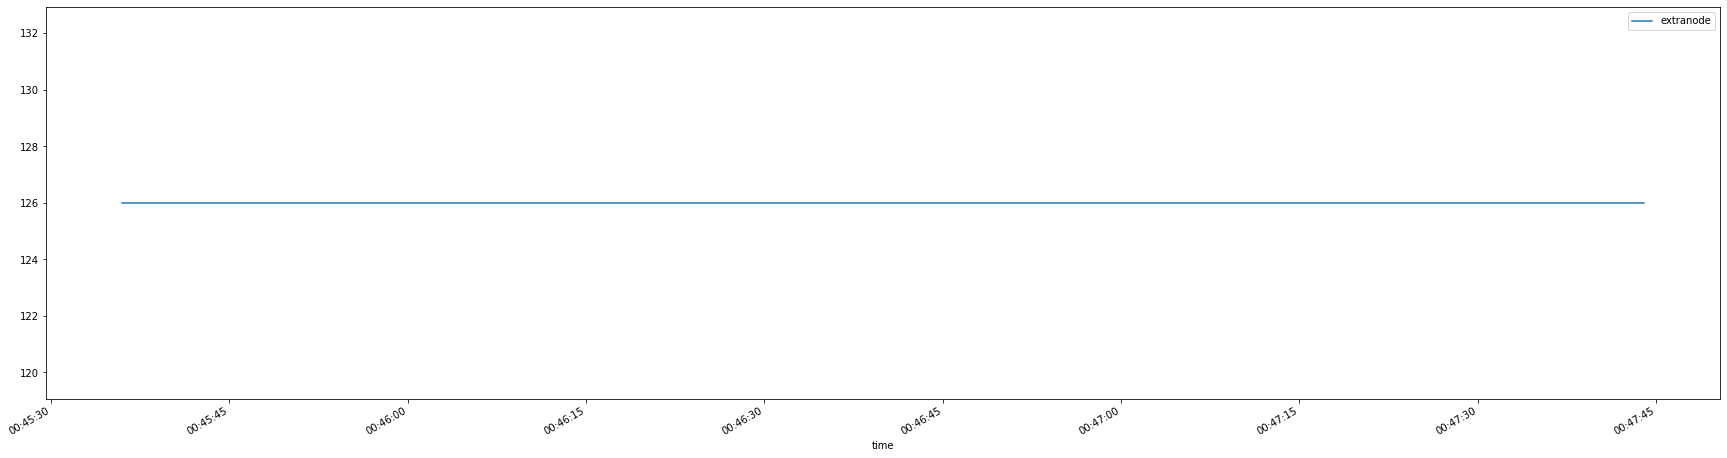

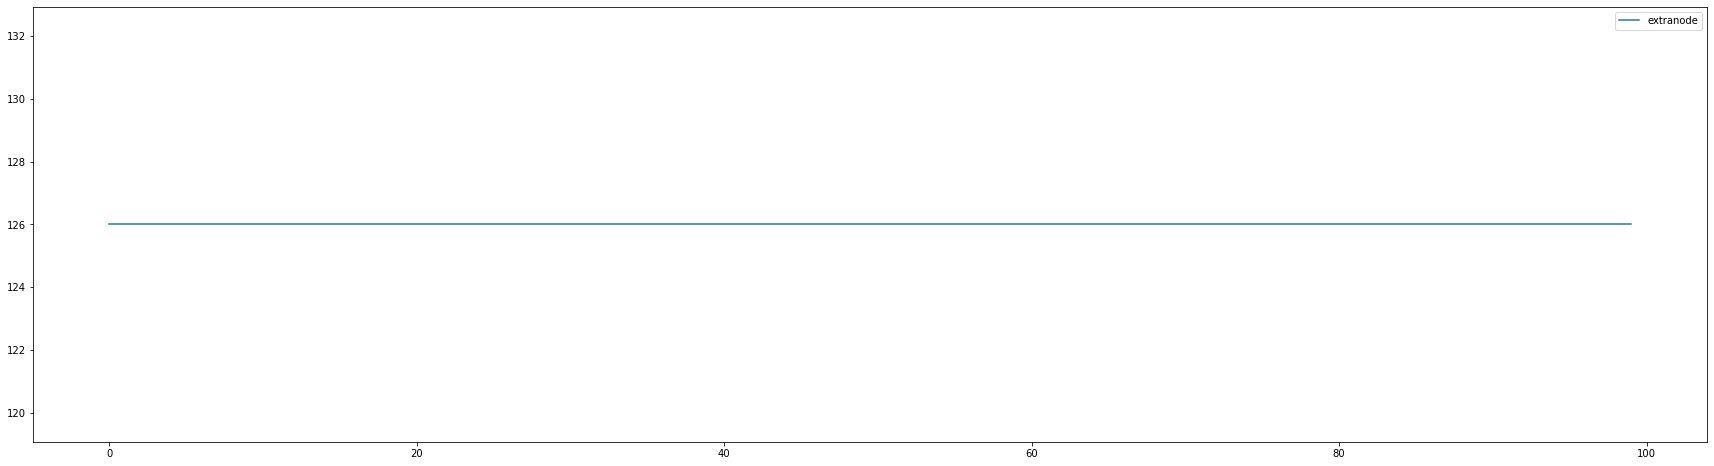

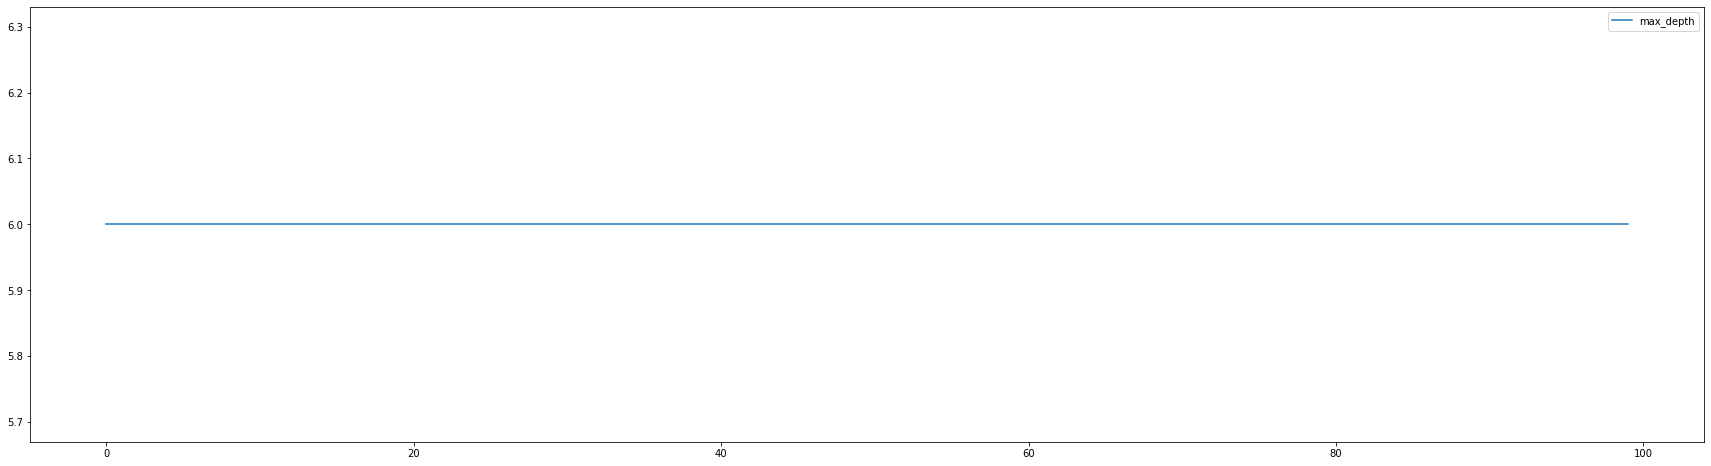

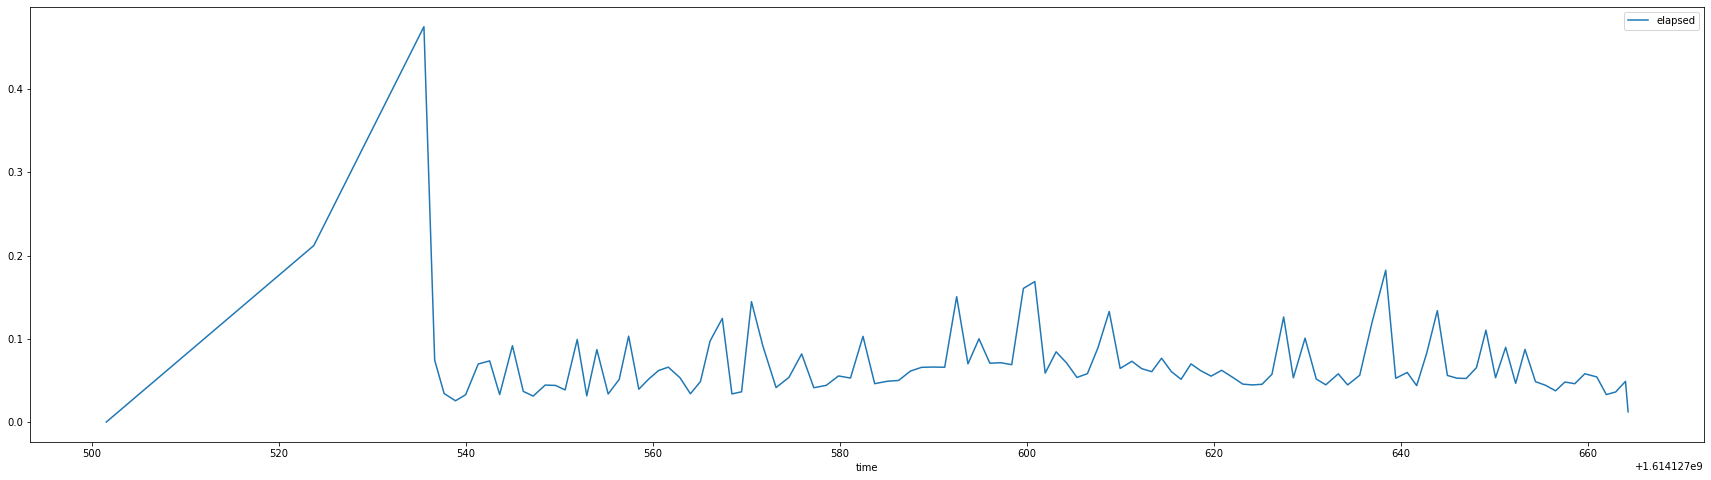

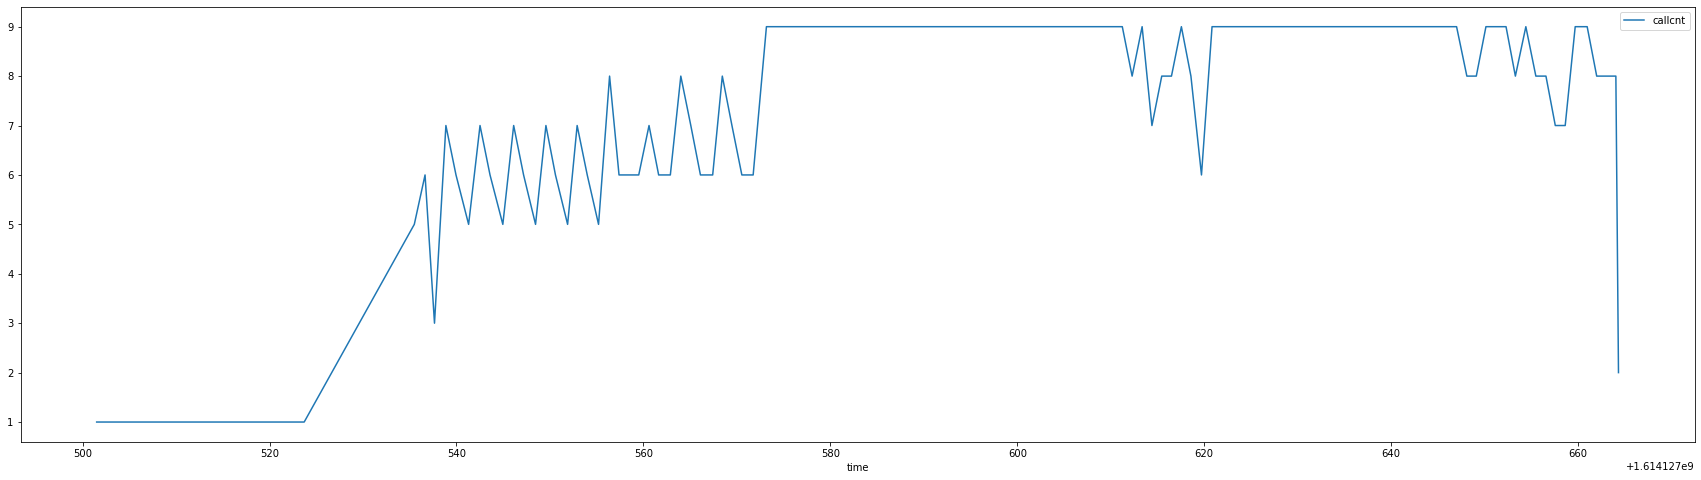

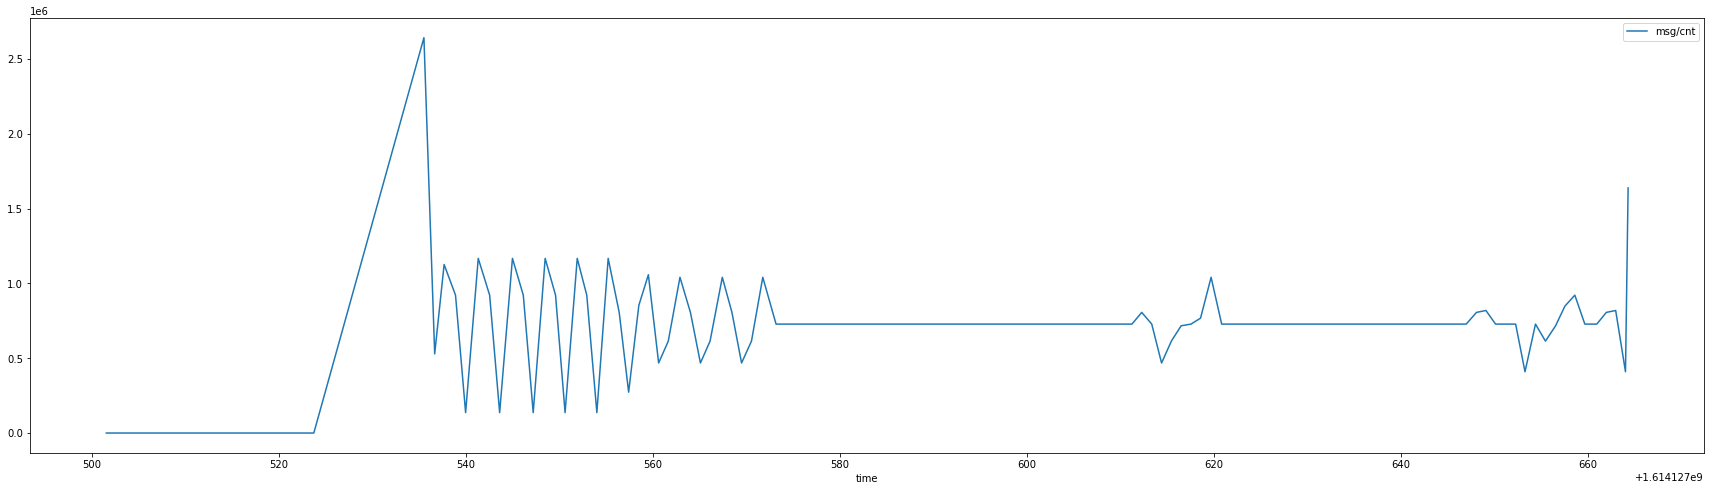

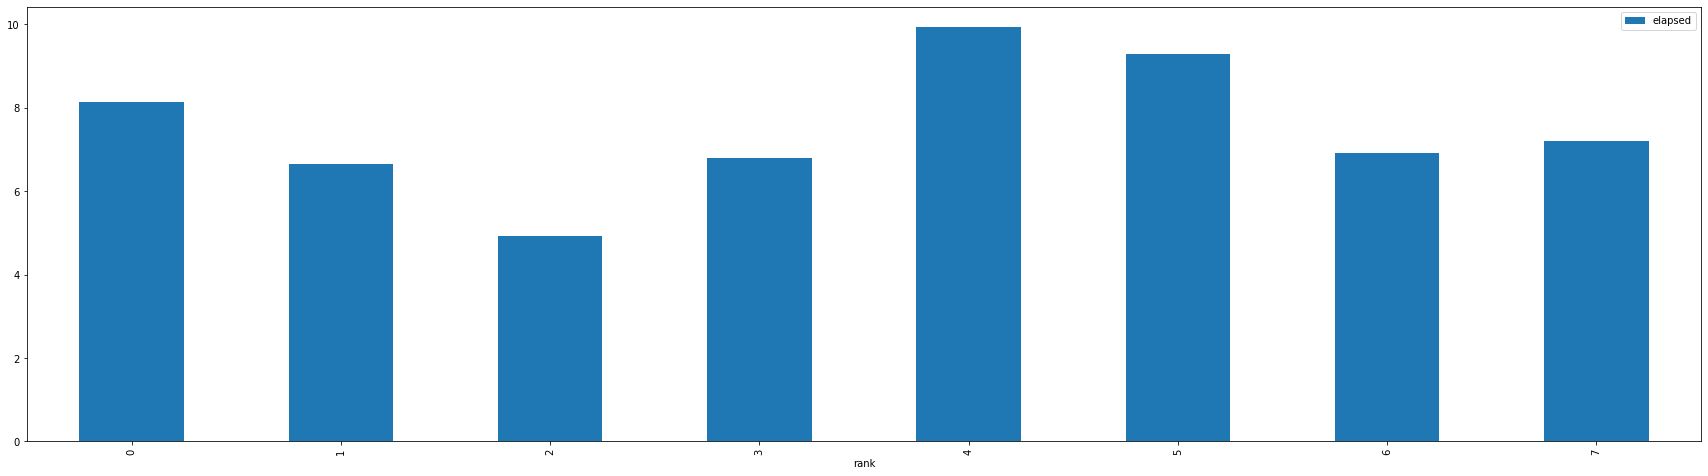

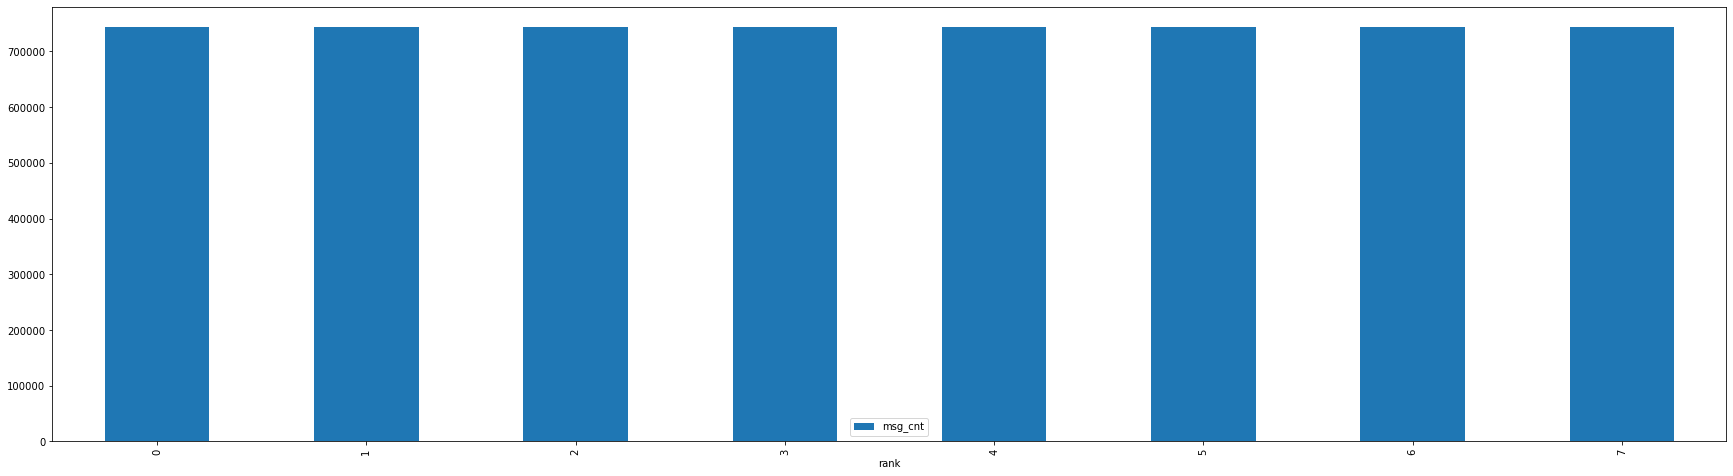

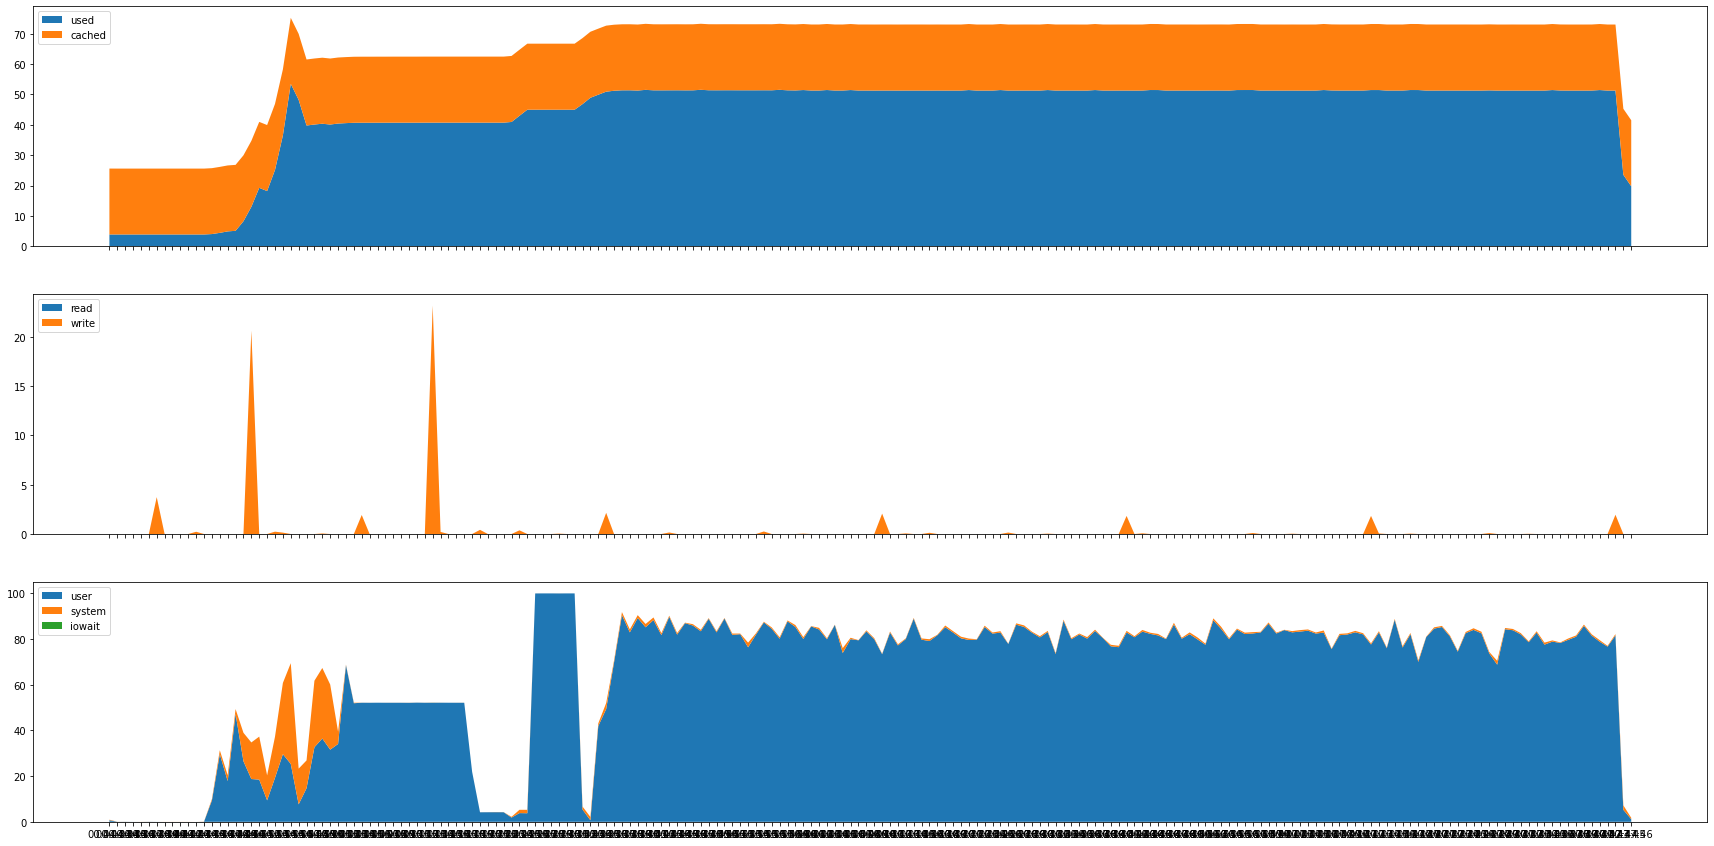

In [48]:
nodes=len(clients)
executors_per_node=int(1*8/nodes)
cores_per_executor=48

cache_size=75*8
total_size=90000*int(8/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
#        numabound_smt(clients)
        startmonitor(clients, appid, collect_emon=False)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

In [ ]:
nodes=len(clients)
executors_per_node=int(1*8/nodes)
cores_per_executor=48

cache_size=75*8
total_size=90000*int(8/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
#        numabound_smt(clients)
        startmonitor(clients, appid, collect_emon=False)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

## 4x24

executor per node: 2
parallelism: 384
memory: 5576m
offheap:38400m
172.31.61.15 : 2   40288	40287
172.31.53.191 : 2   39975	39976
172.31.49.204 : 2   39912	39913
172.31.61.221 : 2   42806	42807
172.31.57.201 : 2   40134	40041
172.31.54.28 : 2   40068	40069
172.31.54.196 : 2   39932	39933
172.31.63.132 : 2   39909	39910
Start time : 13939.618987957


/home/sparkuser
21/02/24 00:22:42 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614125714819_0001/jobs
http://sr525:28080/history/application_1614125714819_0001/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614125714819_0001.json
application_1614125714819_0001


findfont: Font family ['Courier New'] not found. Falling back to DejaVu Sans.


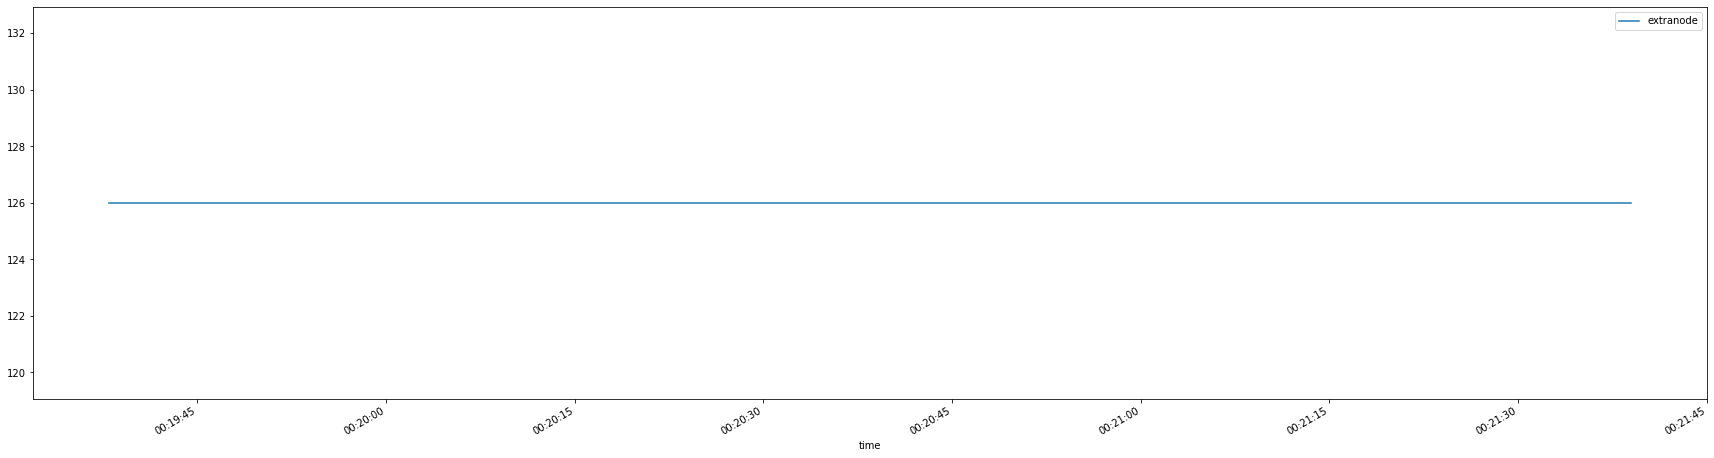

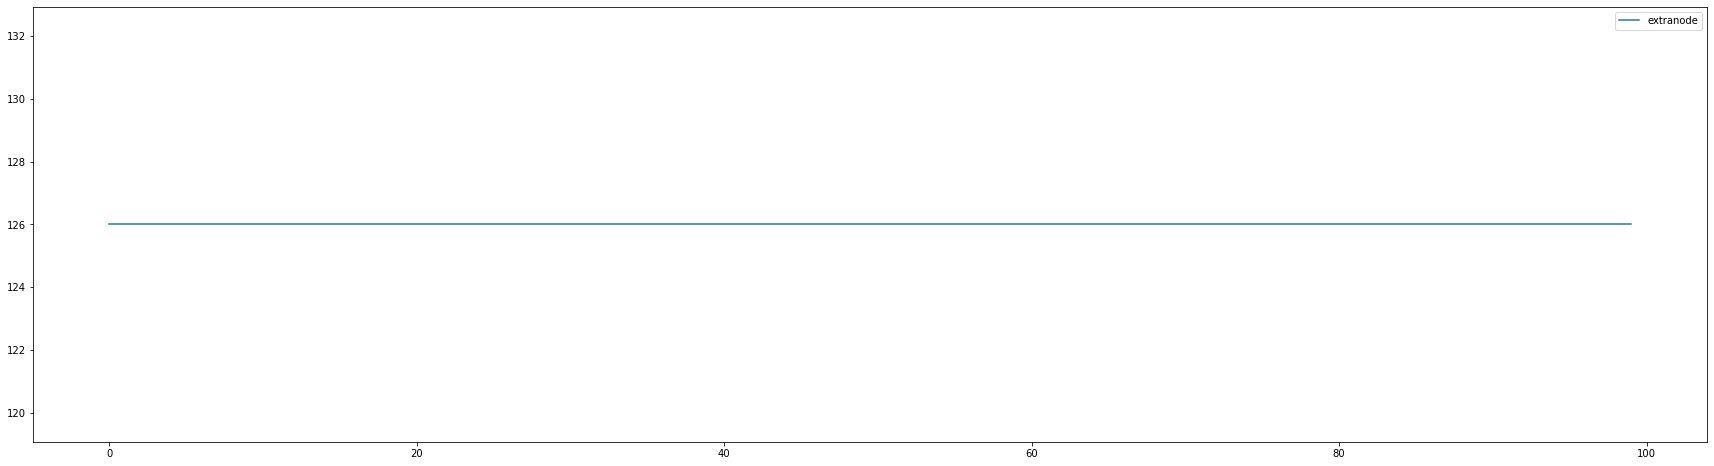

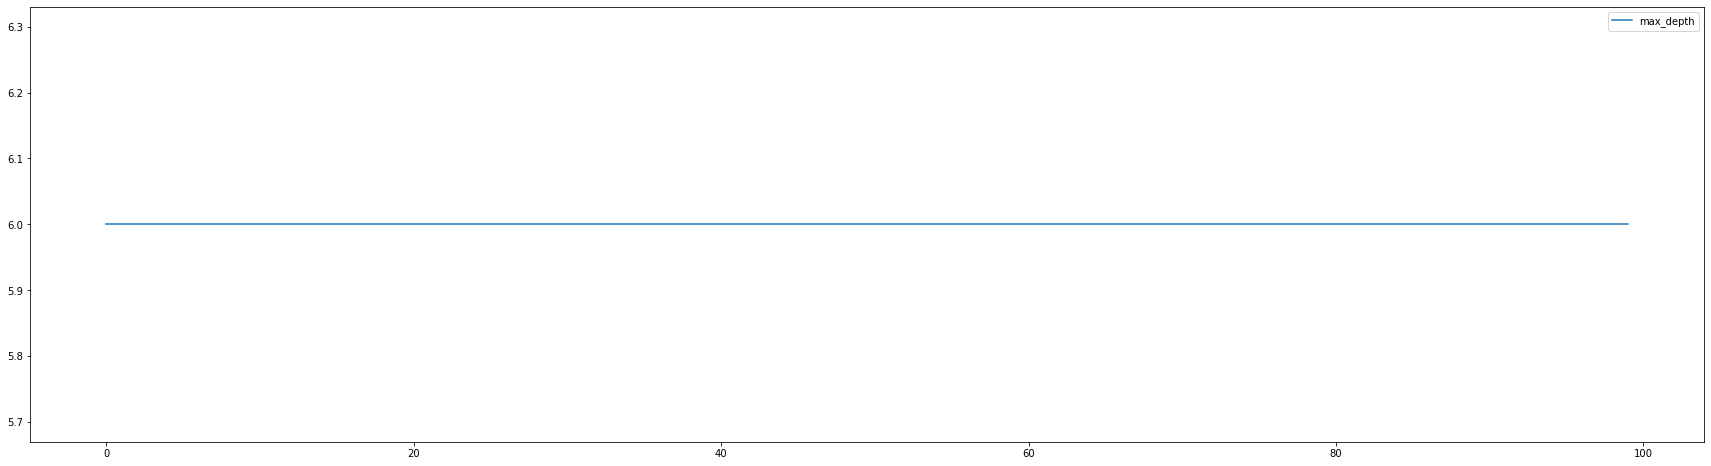

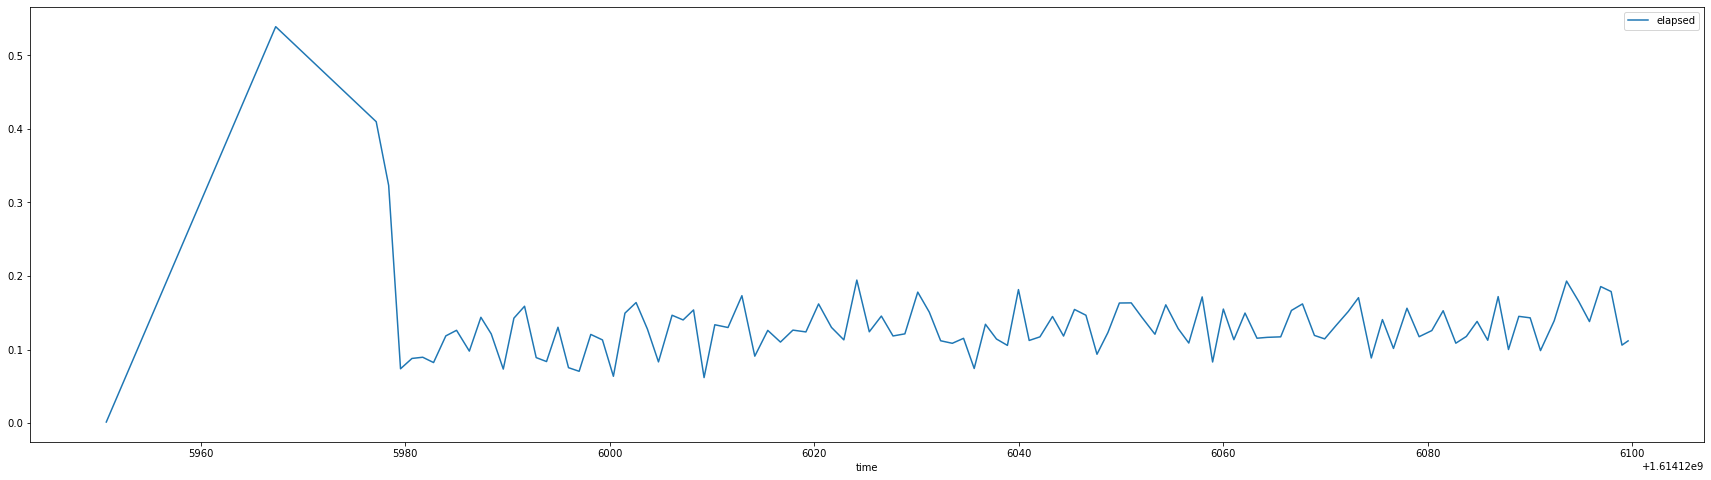

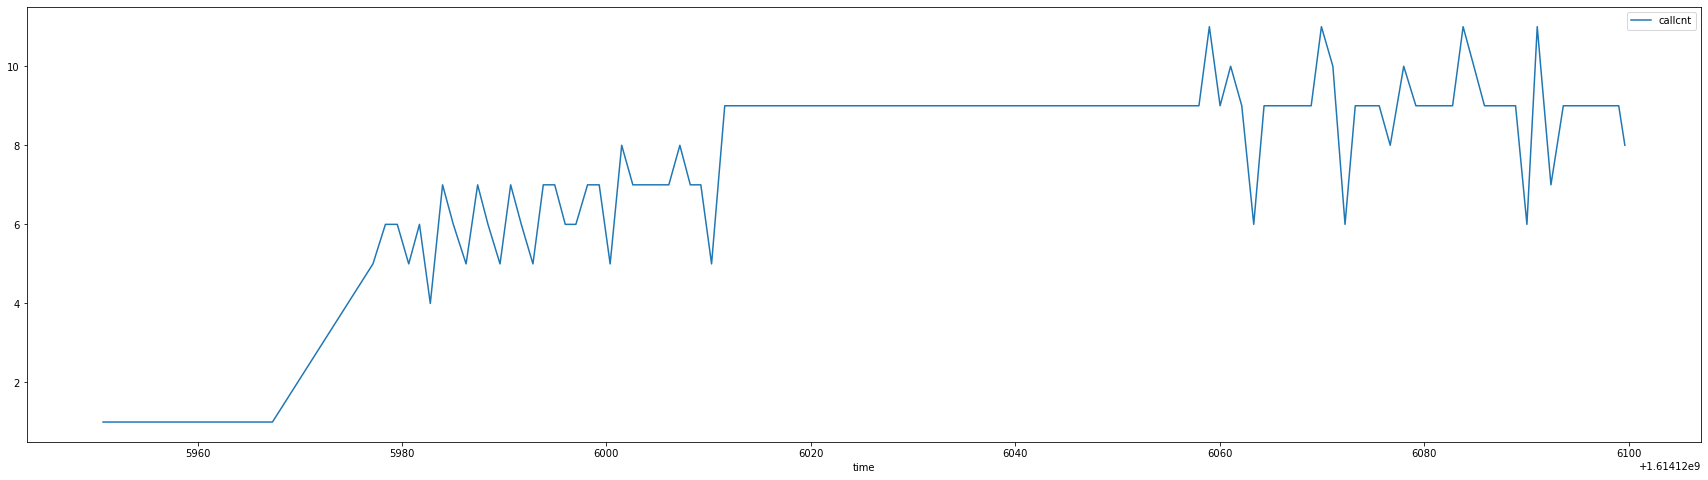

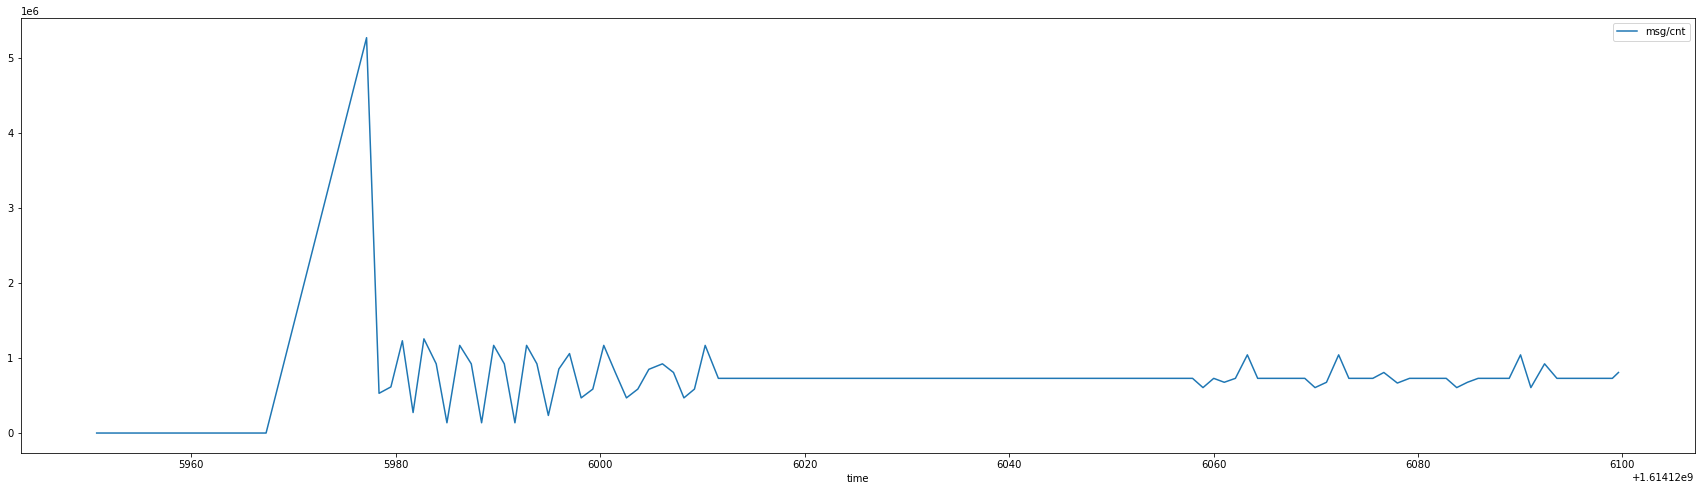

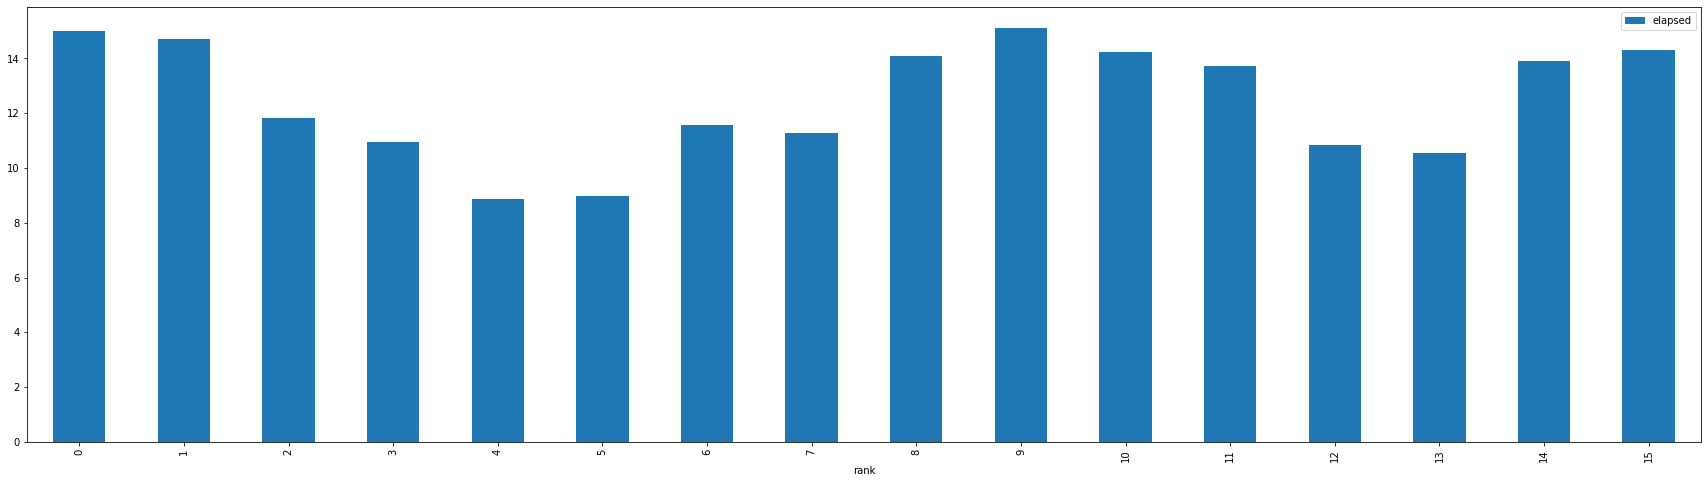

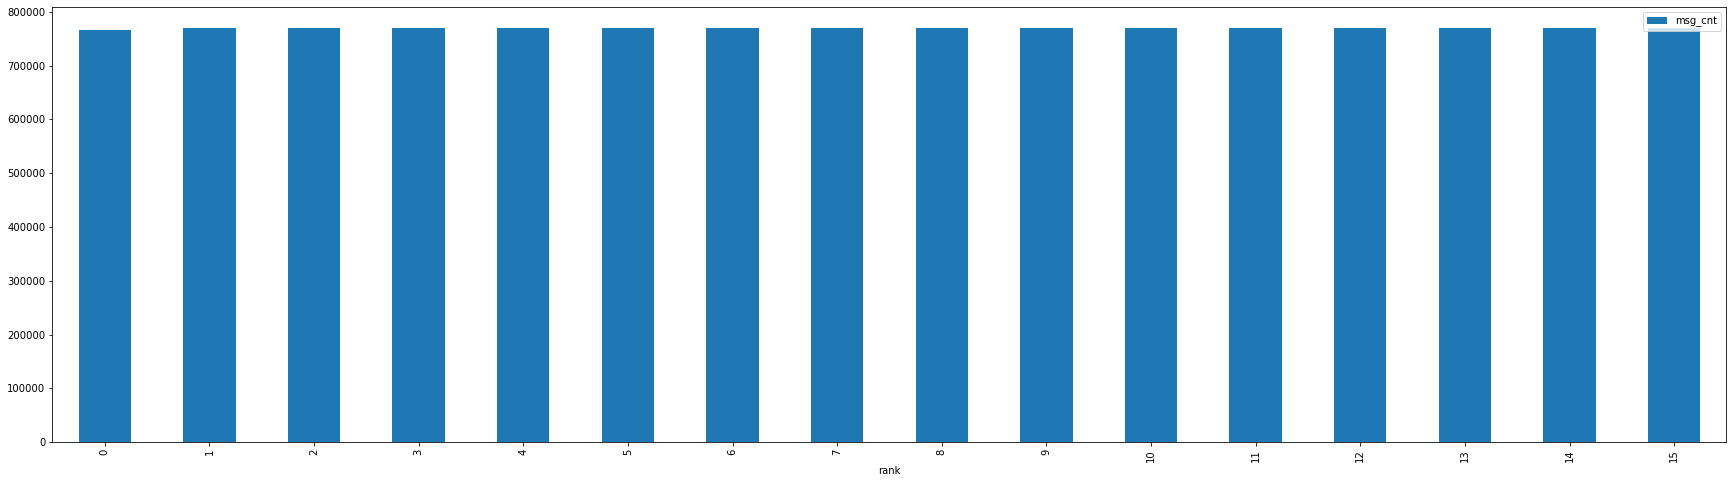

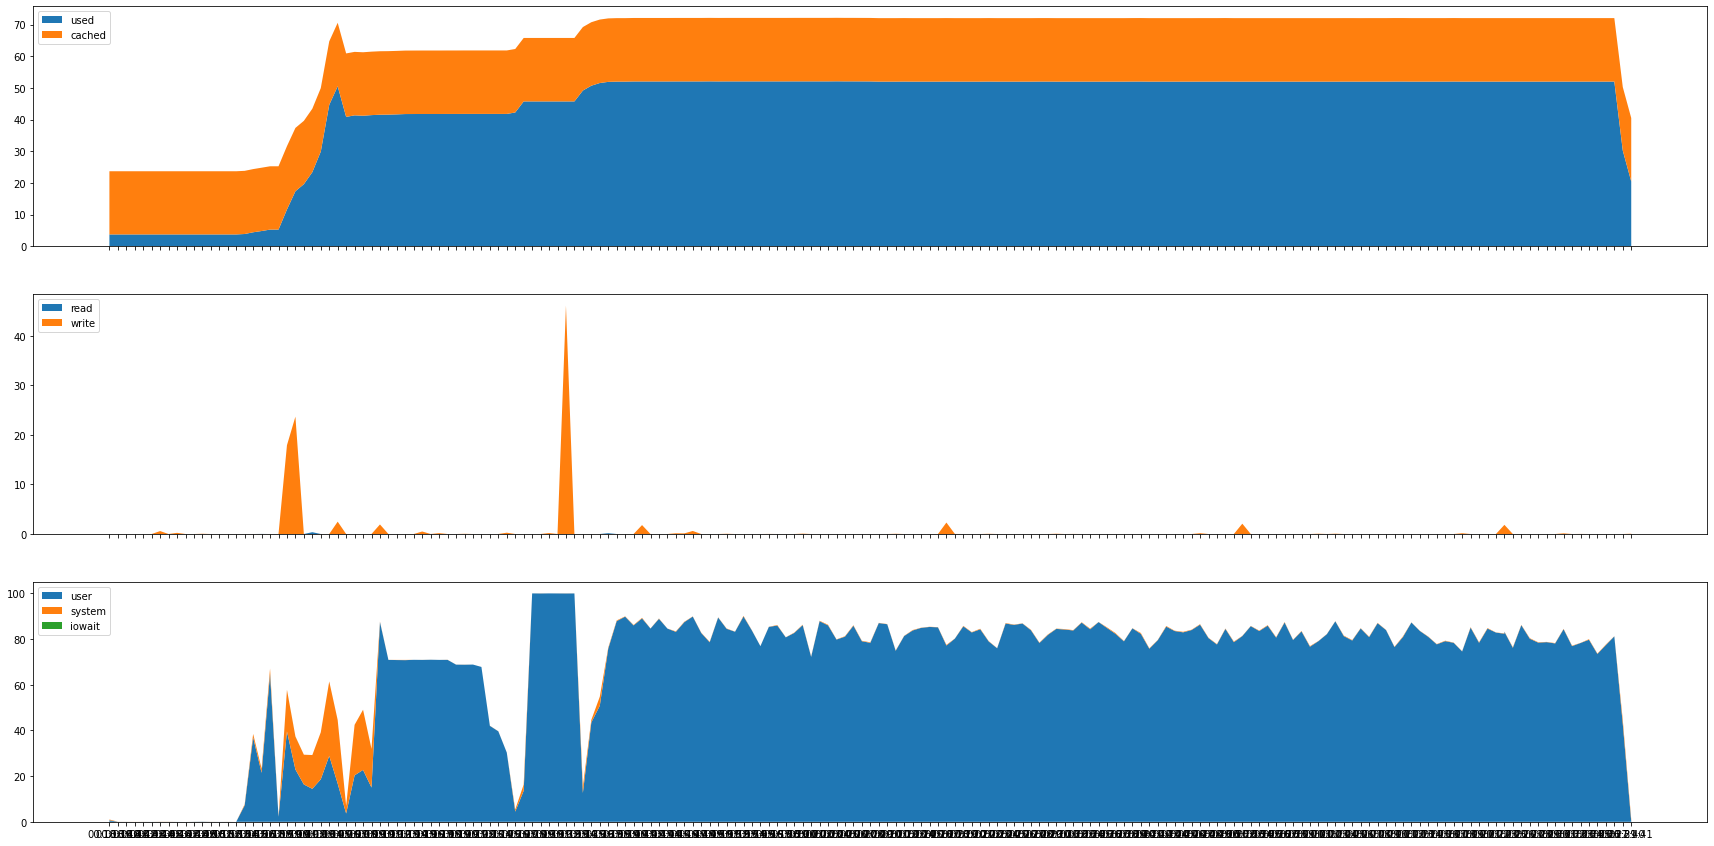

In [41]:
nodes=len(clients)
executors_per_node=int(2*8/nodes)
cores_per_executor=24

cache_size=75*8
total_size=90000*int(8/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=False)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 2
parallelism: 384
memory: 5576m
offheap:38400m
172.31.61.15 : 2   44164	44068
172.31.53.191 : 2   43709	43663
172.31.49.204 : 2   43462	43467
172.31.61.221 : 2   46460	46414
172.31.57.201 : 2   43856	43855
172.31.54.28 : 2   43832	43899
172.31.54.196 : 2   43597	43598
172.31.63.132 : 2   43601	43602
Start time : 14264.548612128


/home/sparkuser
21/02/24 00:28:05 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614125714819_0002/jobs
http://sr525:28080/history/application_1614125714819_0002/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614125714819_0002.json
application_1614125714819_0002


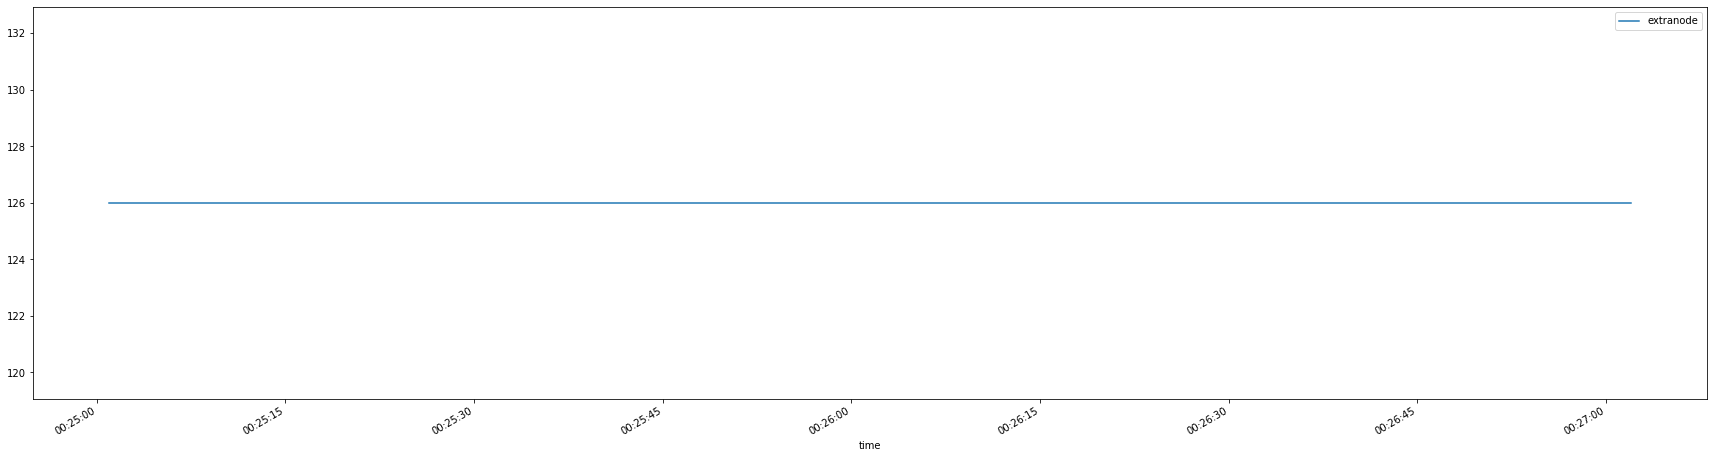

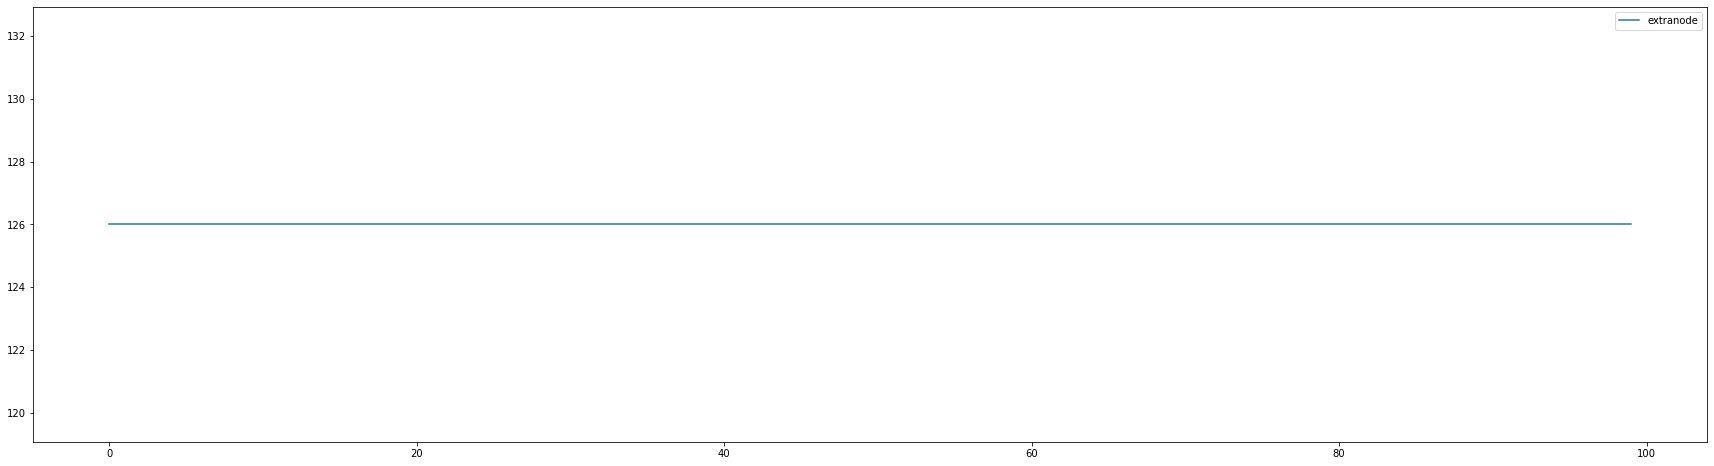

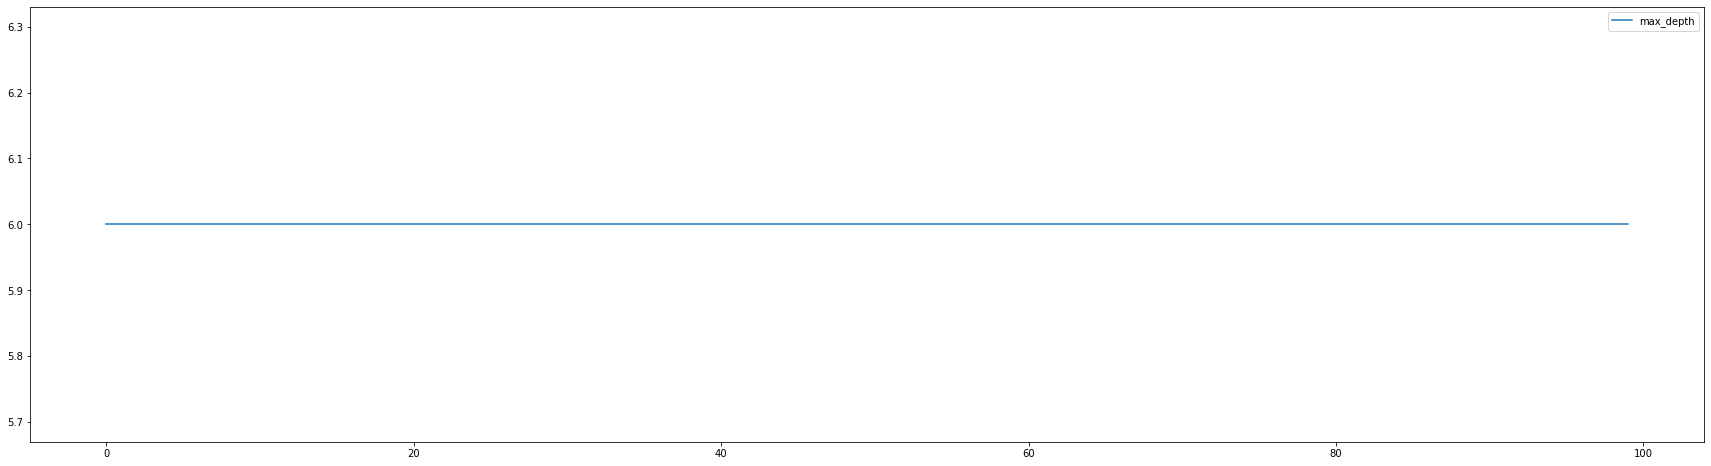

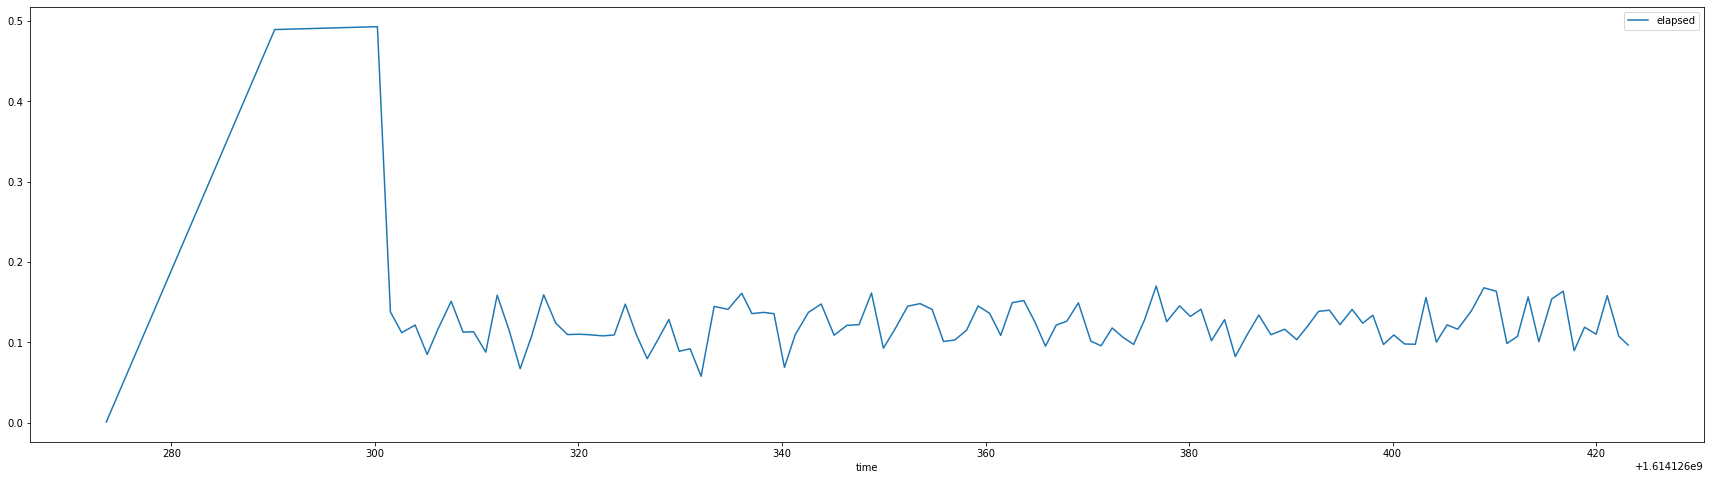

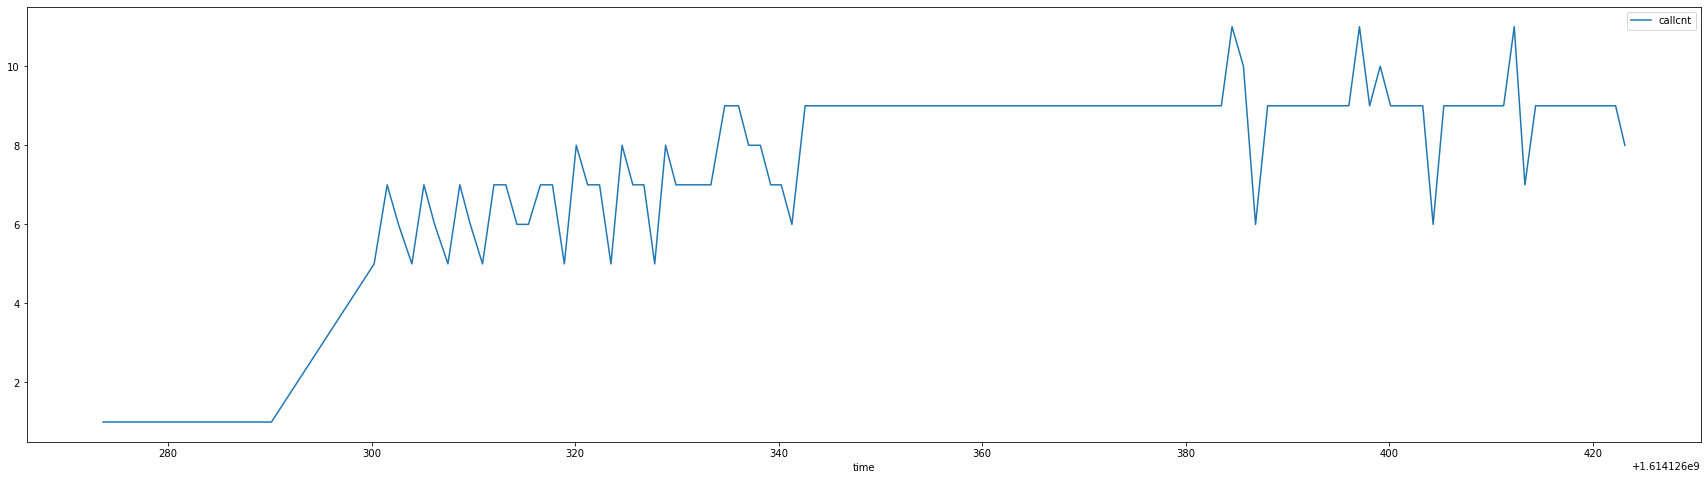

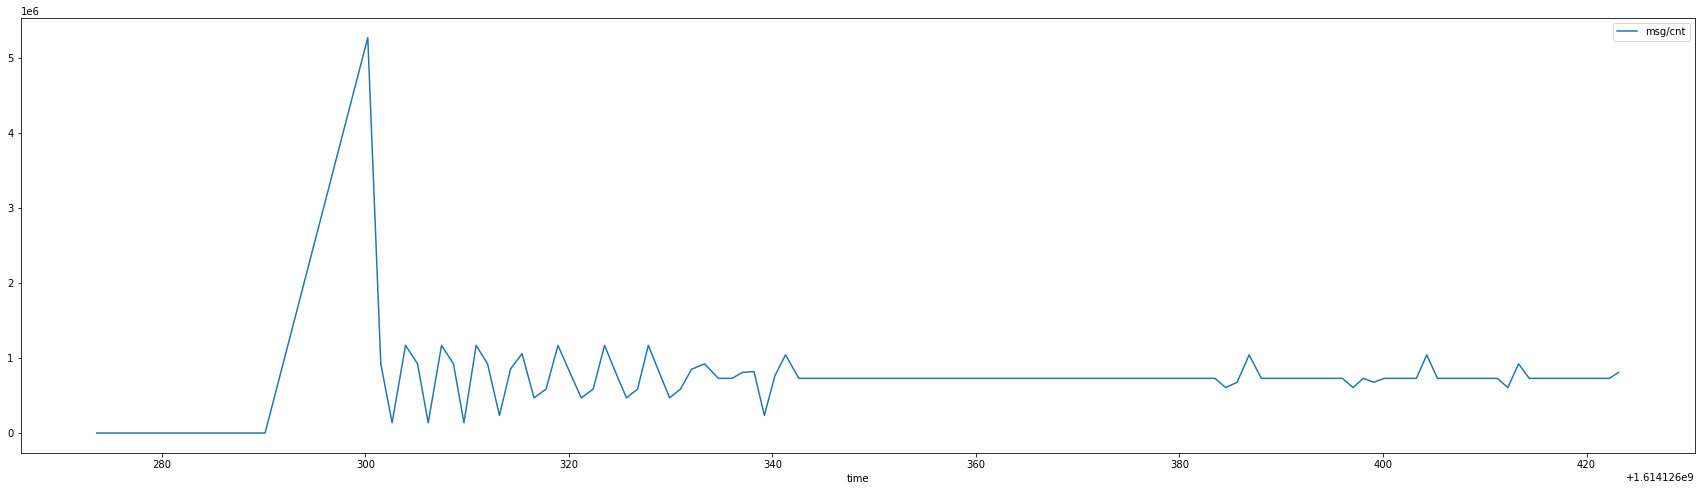

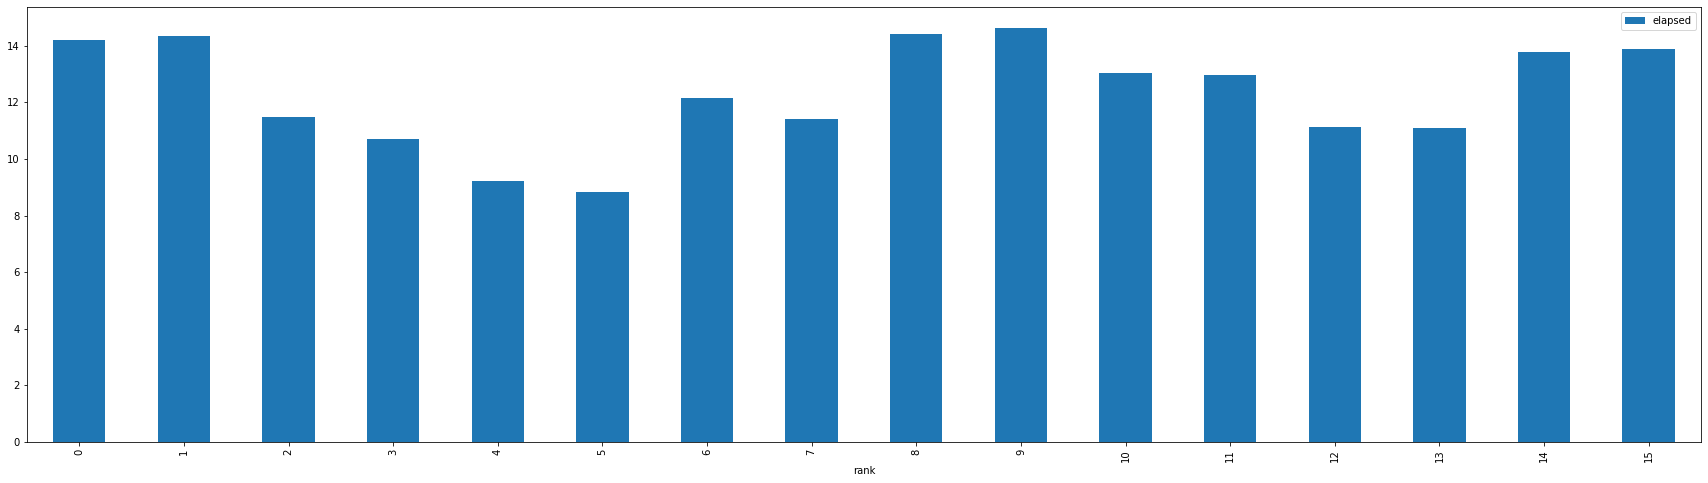

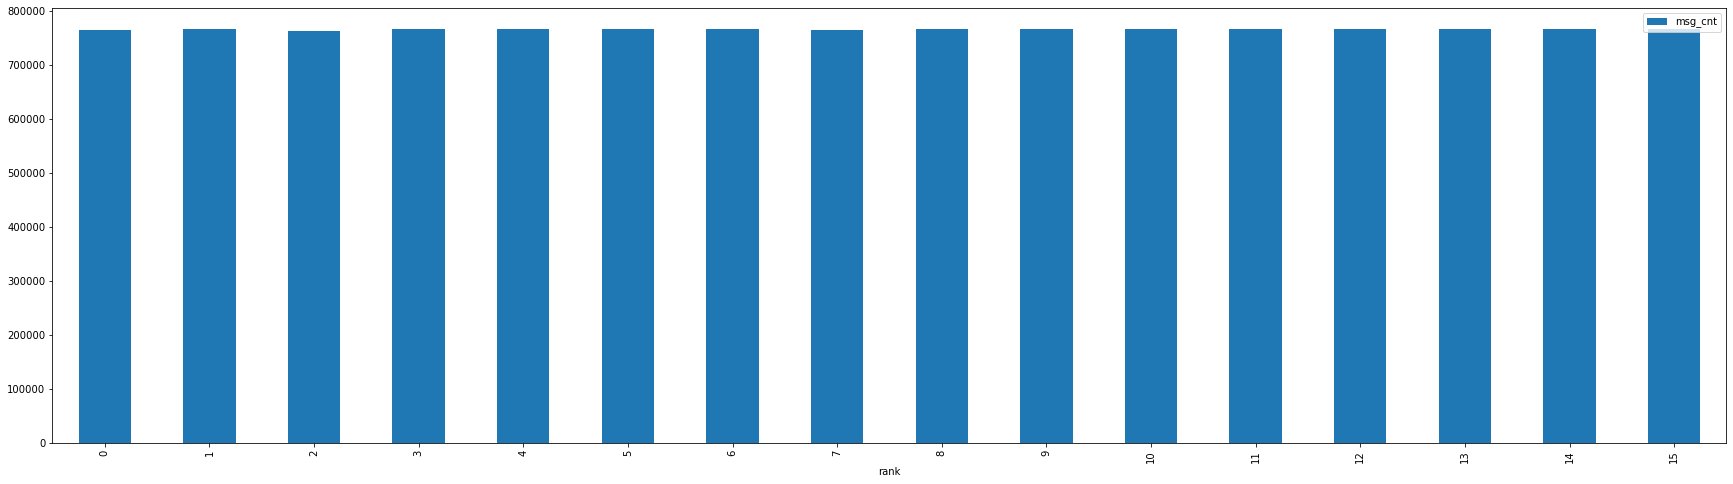

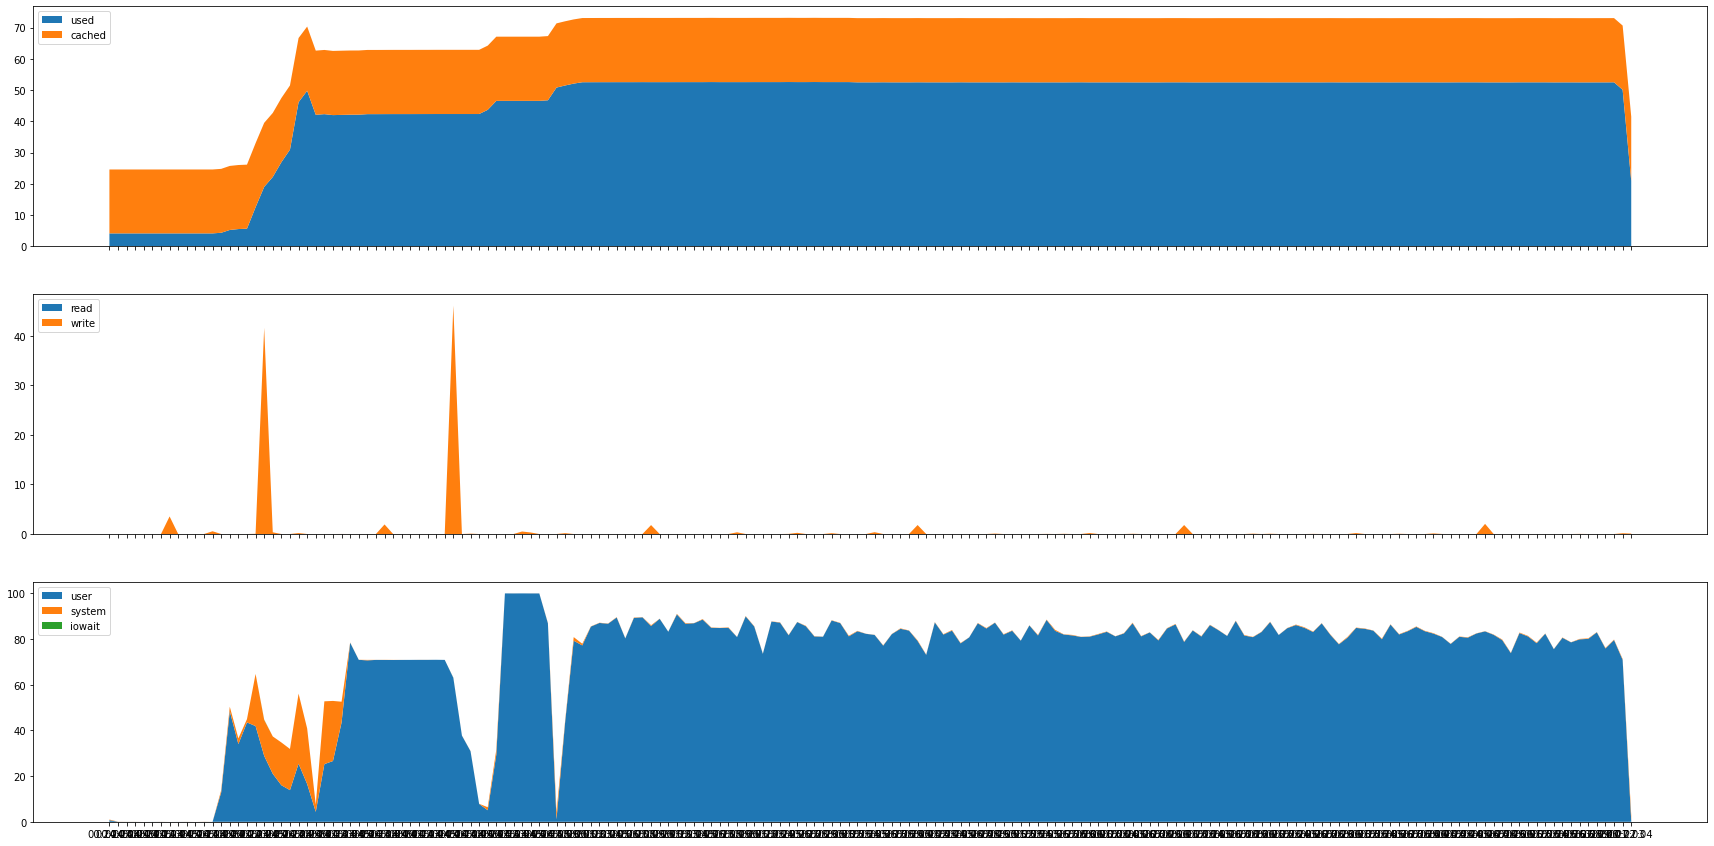

In [42]:
nodes=len(clients)
executors_per_node=int(2*8/nodes)
cores_per_executor=24

cache_size=75*8
total_size=90000*int(8/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
#        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=False)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

In [ ]:
nodes=len(clients)
executors_per_node=int(2*8/nodes)
cores_per_executor=24

cache_size=75*8
total_size=90000*int(8/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
#        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=False)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 2
parallelism: 384
memory: 5576m
offheap:38400m
172.31.61.15 : 2   20201	20270


## collect emon leads to bad performance

executor per node: 2
parallelism: 384
memory: 5576m
offheap:38400m
172.31.61.15 : 2   2450	2518
172.31.53.191 : 2   2137	2028
172.31.49.204 : 2   1621	1551
172.31.61.221 : 2   4634	4701
172.31.57.201 : 2   2080	2012
172.31.54.28 : 2   1952	1953
172.31.54.196 : 2   1924	1855
172.31.63.132 : 2   1930	1997
Start time : 14957.878775201


/home/sparkuser
21/02/24 00:40:20 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614125714819_0004/jobs
http://sr525:28080/history/application_1614125714819_0004/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614125714819_0004.json
application_1614125714819_0004


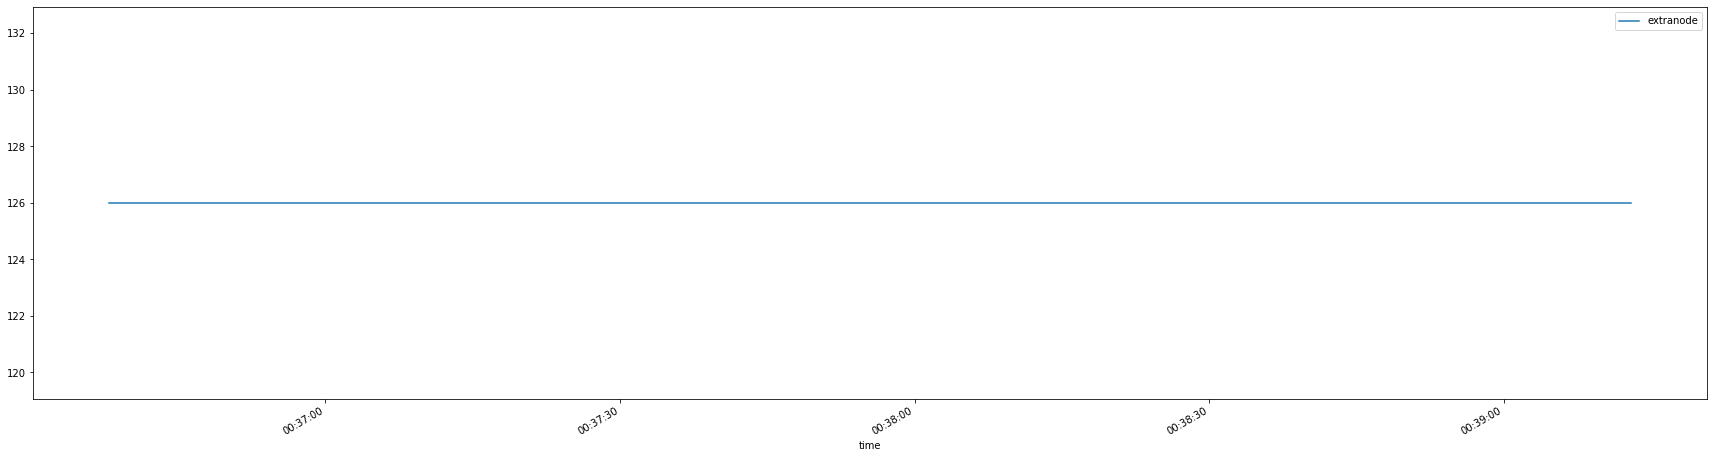

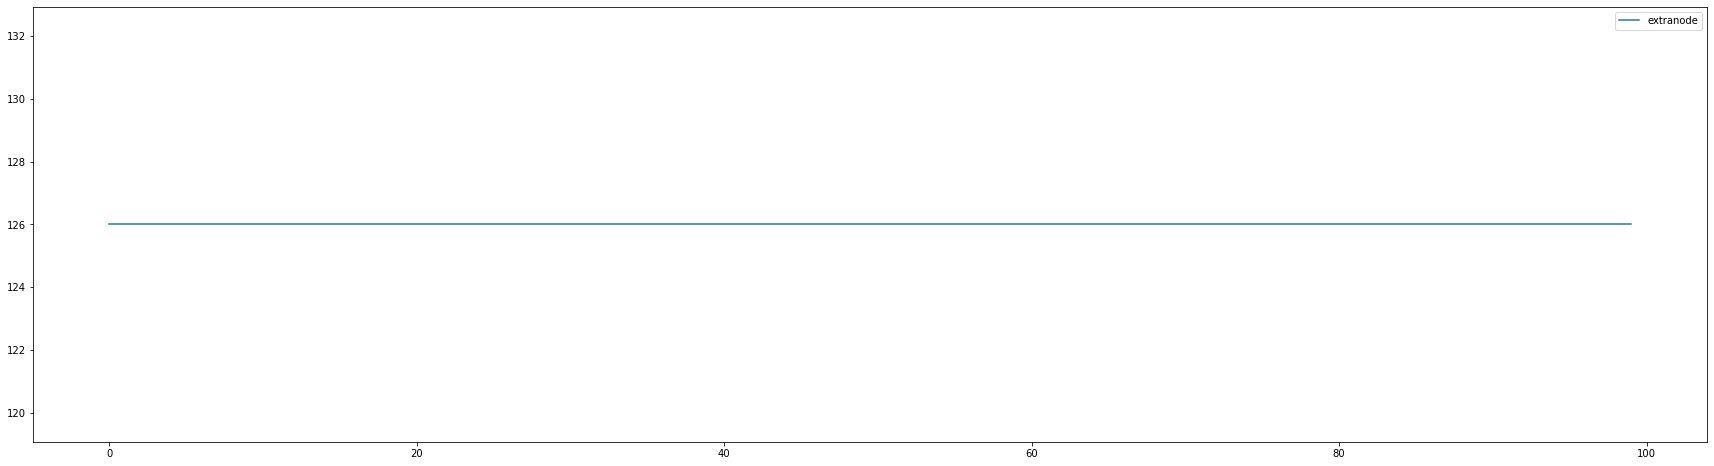

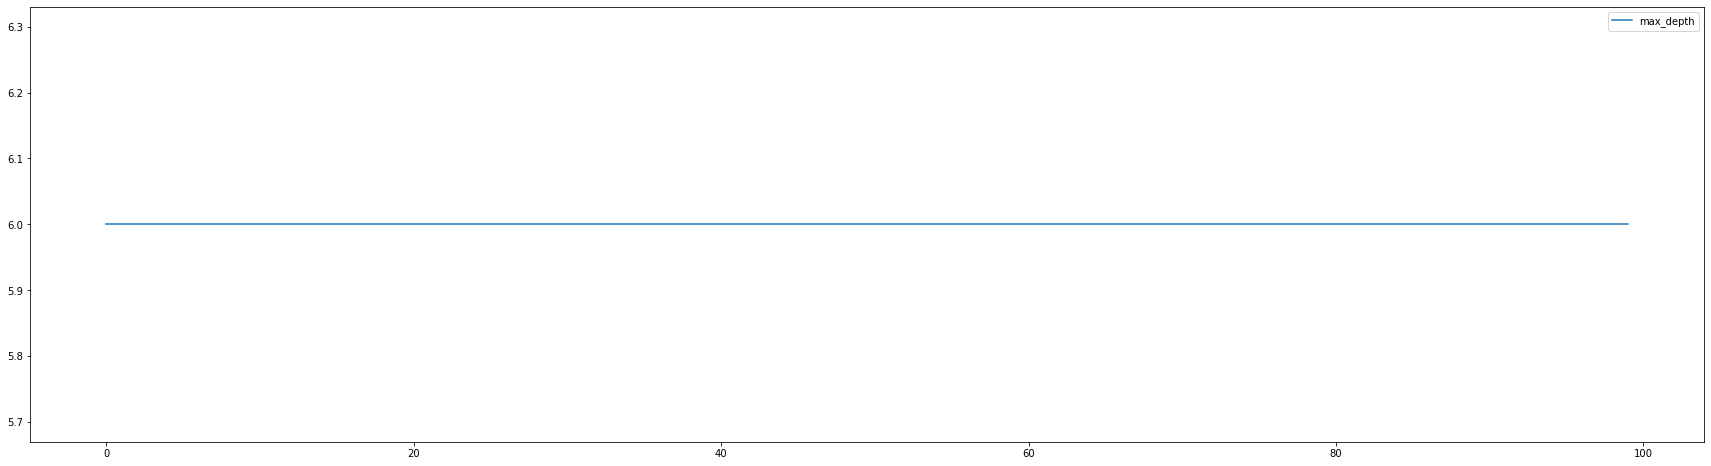

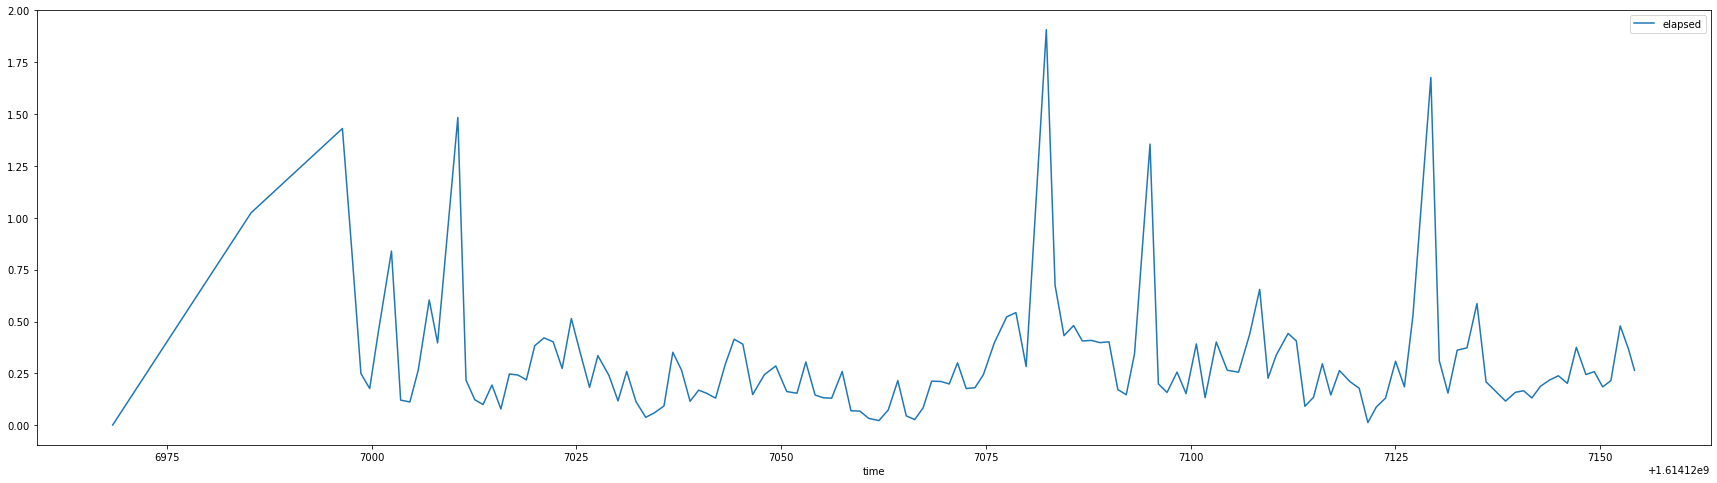

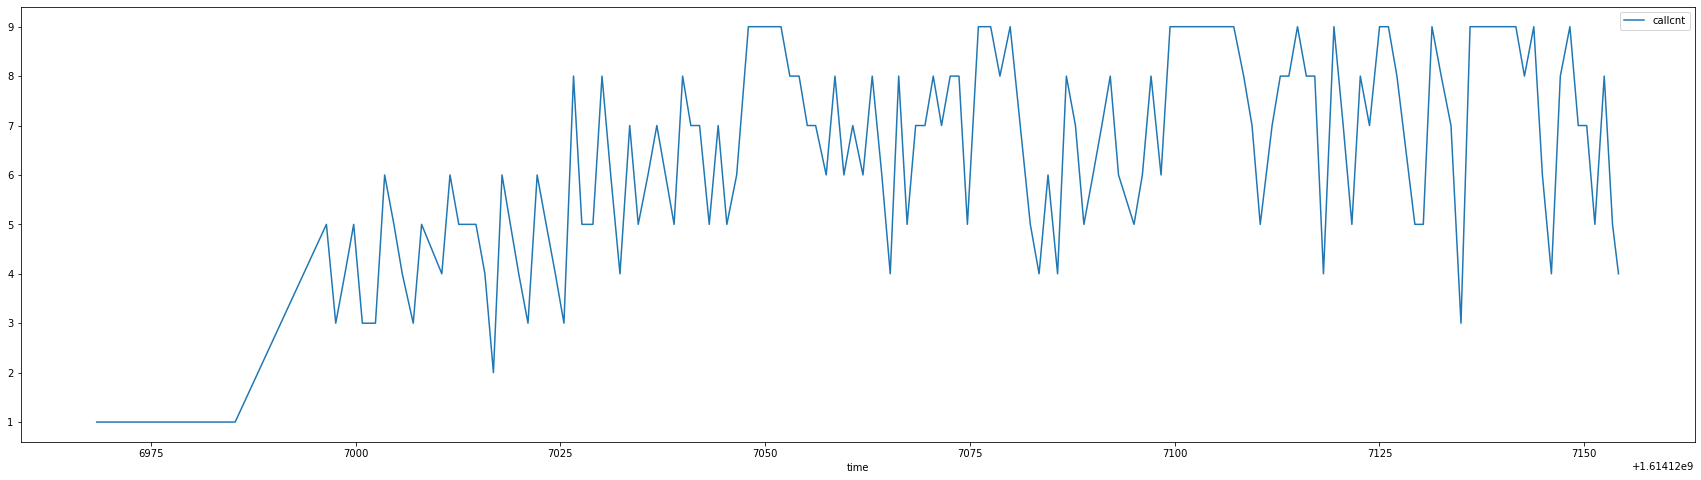

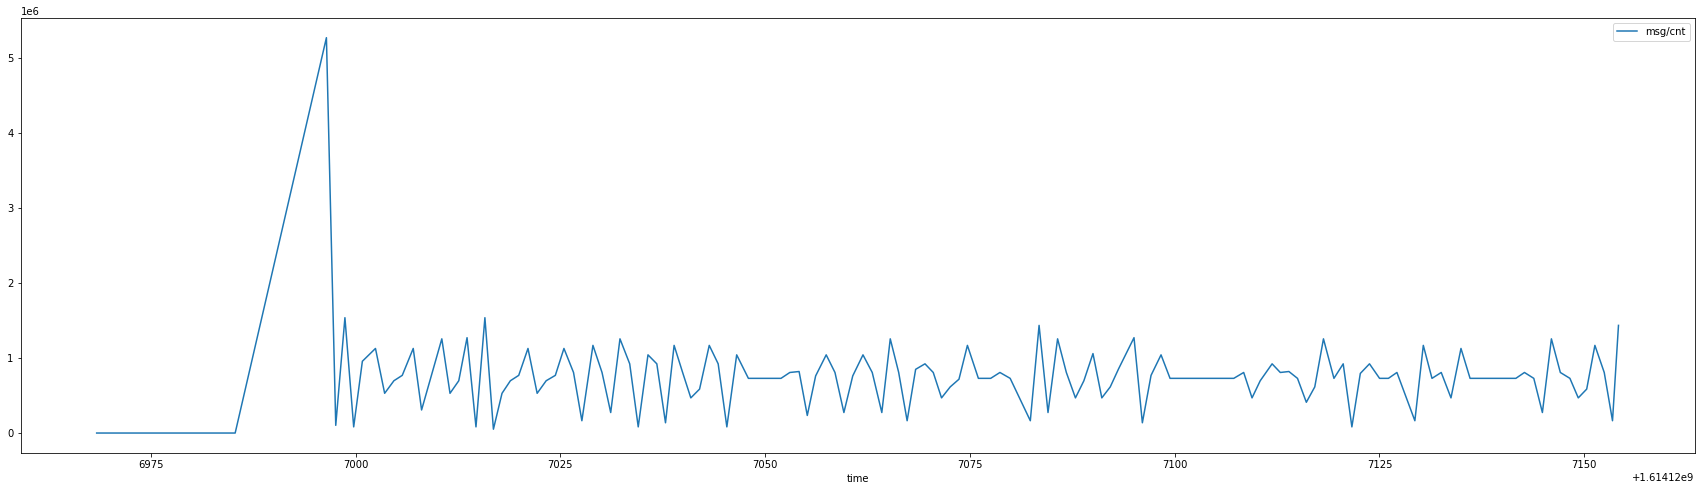

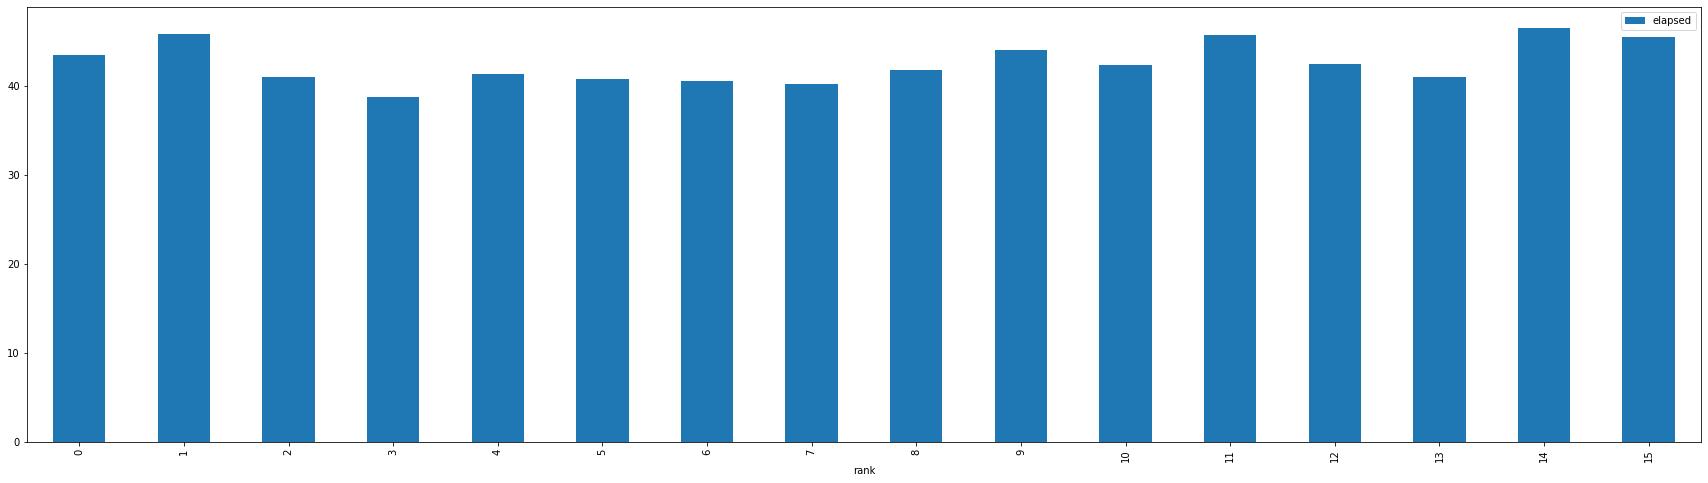

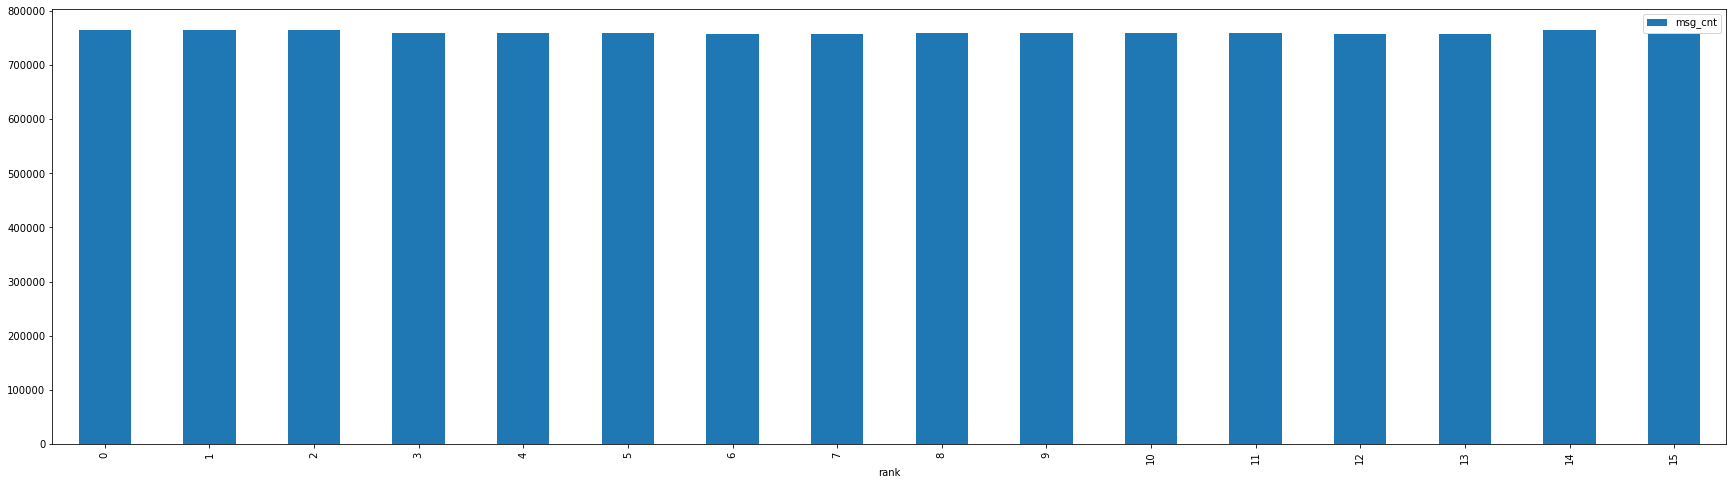

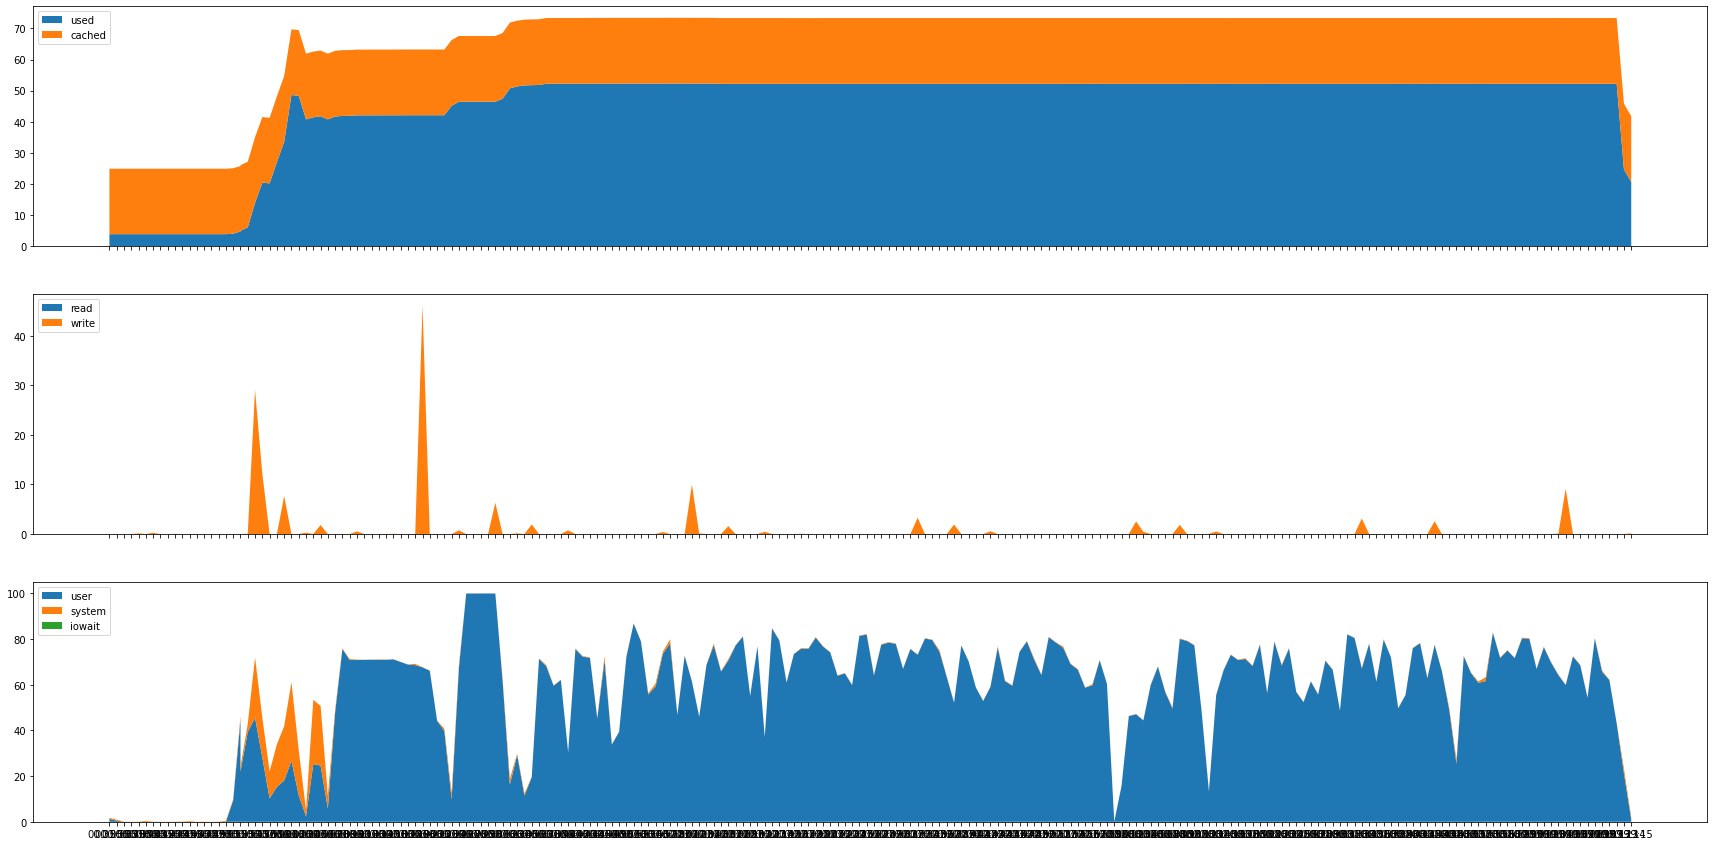

In [44]:
nodes=len(clients)
executors_per_node=int(2*8/nodes)
cores_per_executor=24

cache_size=75*8
total_size=90000*int(8/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 2
parallelism: 384
memory: 5576m
offheap:38400m
172.31.61.15 : 2   47543	47610
172.31.53.191 : 2   47024	47073
172.31.49.204 : 2   46869	46936
172.31.61.221 : 2   1091	1016
172.31.57.201 : 2   47217	47284
172.31.54.28 : 2   47168	47217
172.31.54.196 : 2   47088	47155
172.31.63.132 : 2   47088	47177
Start time : 14596.511025437


/home/sparkuser
21/02/24 00:33:53 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614125714819_0003/jobs
http://sr525:28080/history/application_1614125714819_0003/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614125714819_0003.json
application_1614125714819_0003


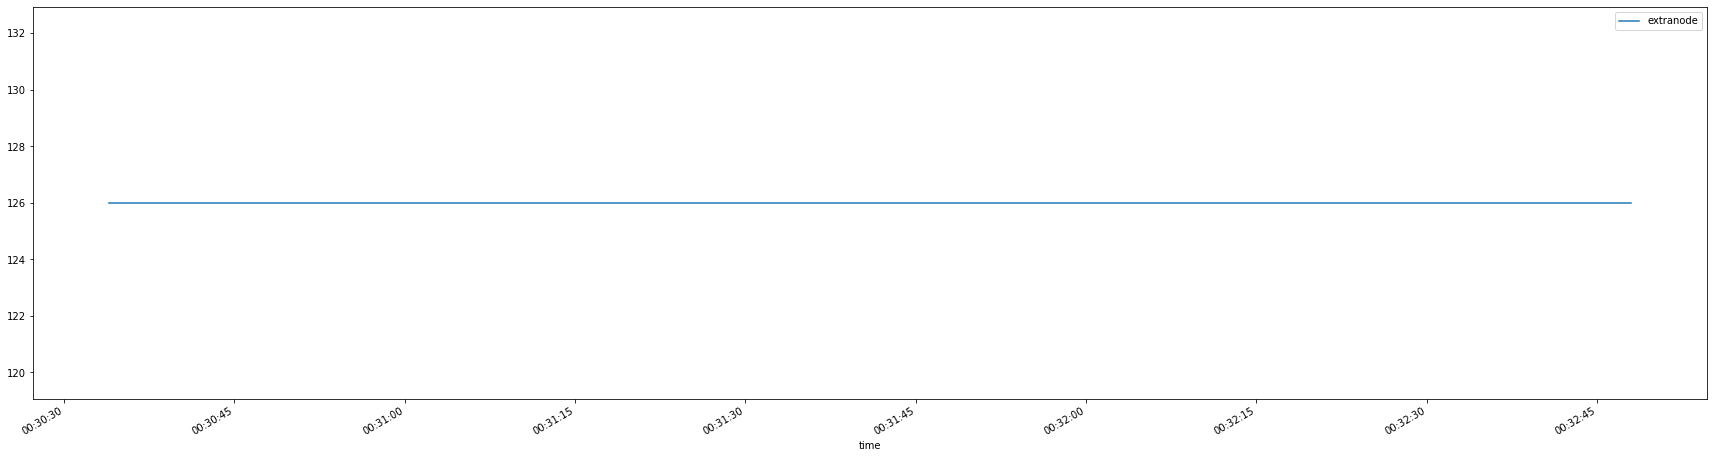

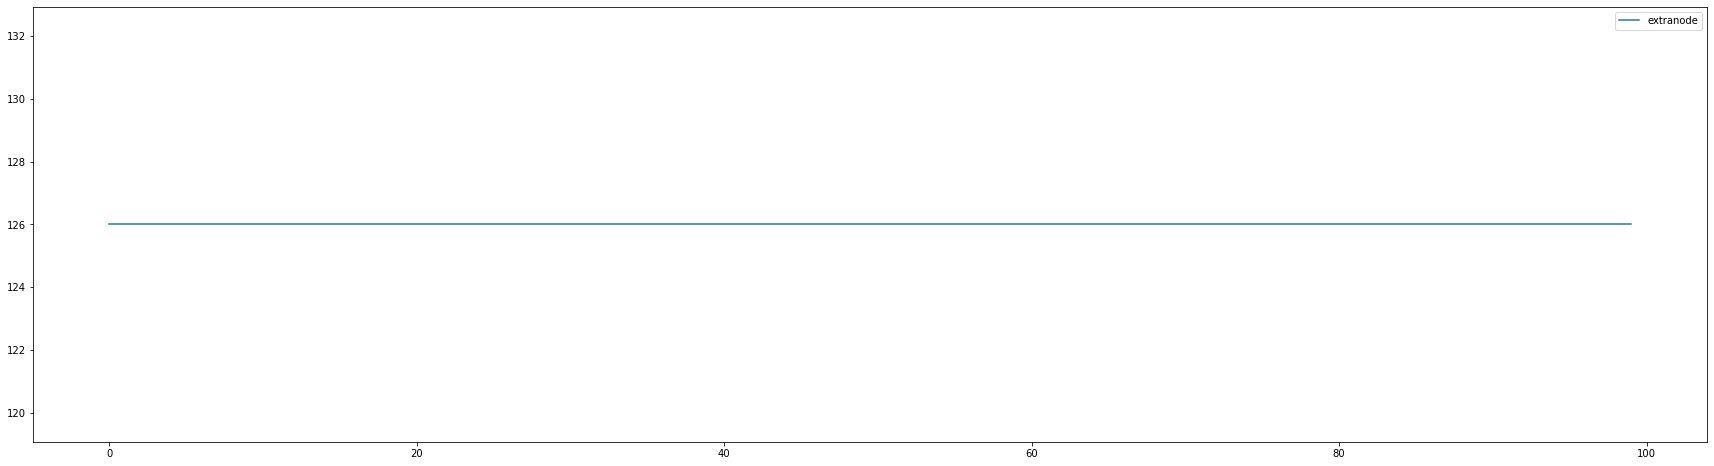

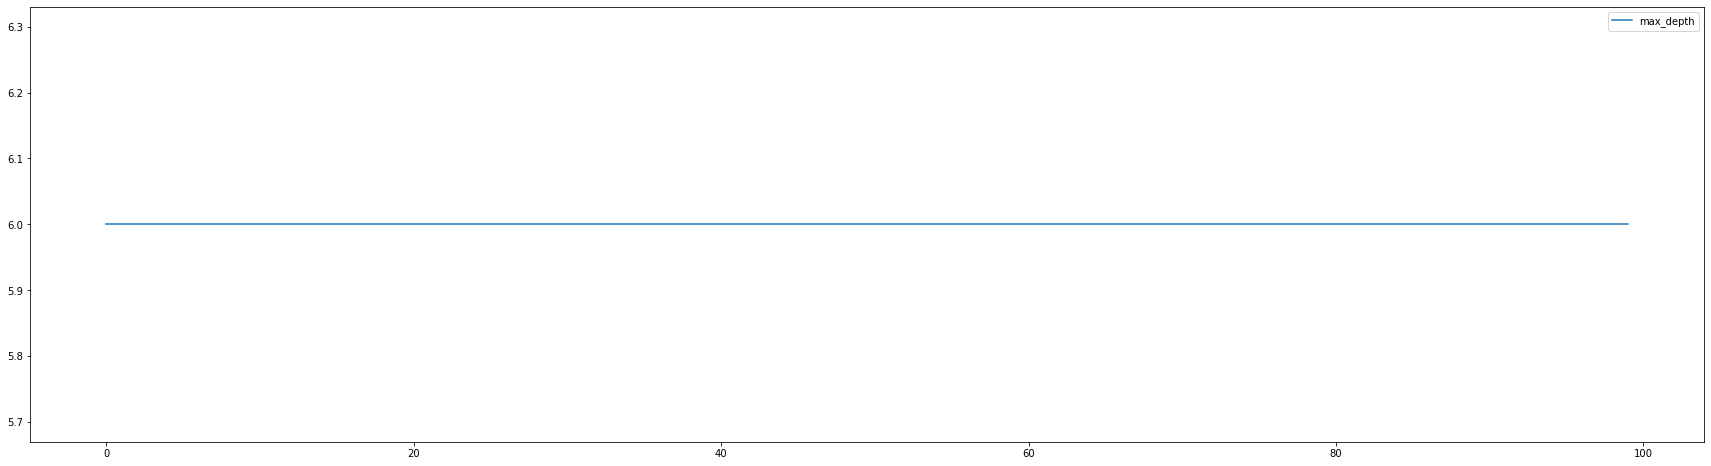

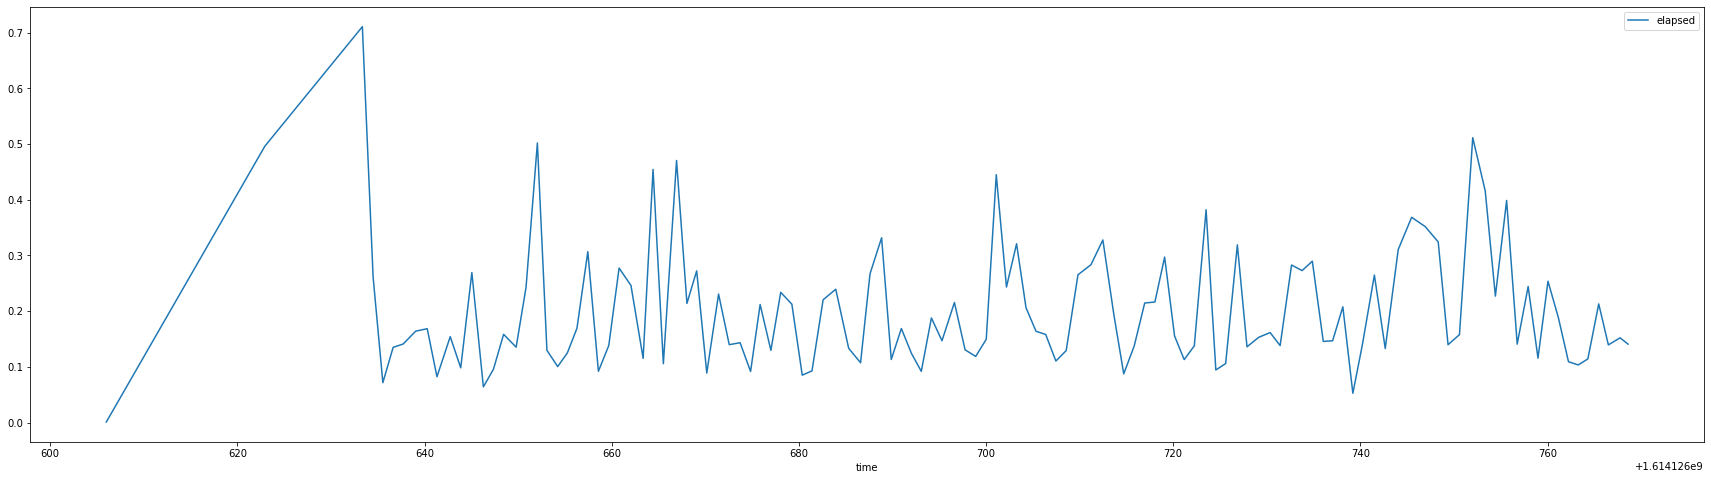

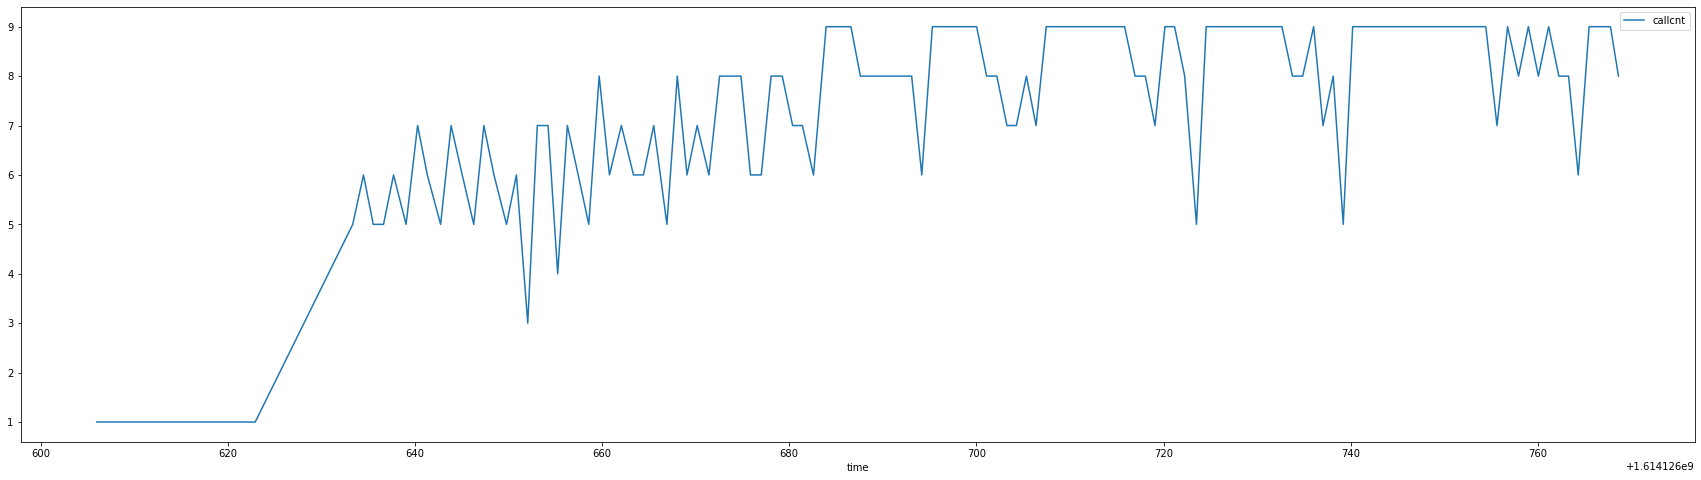

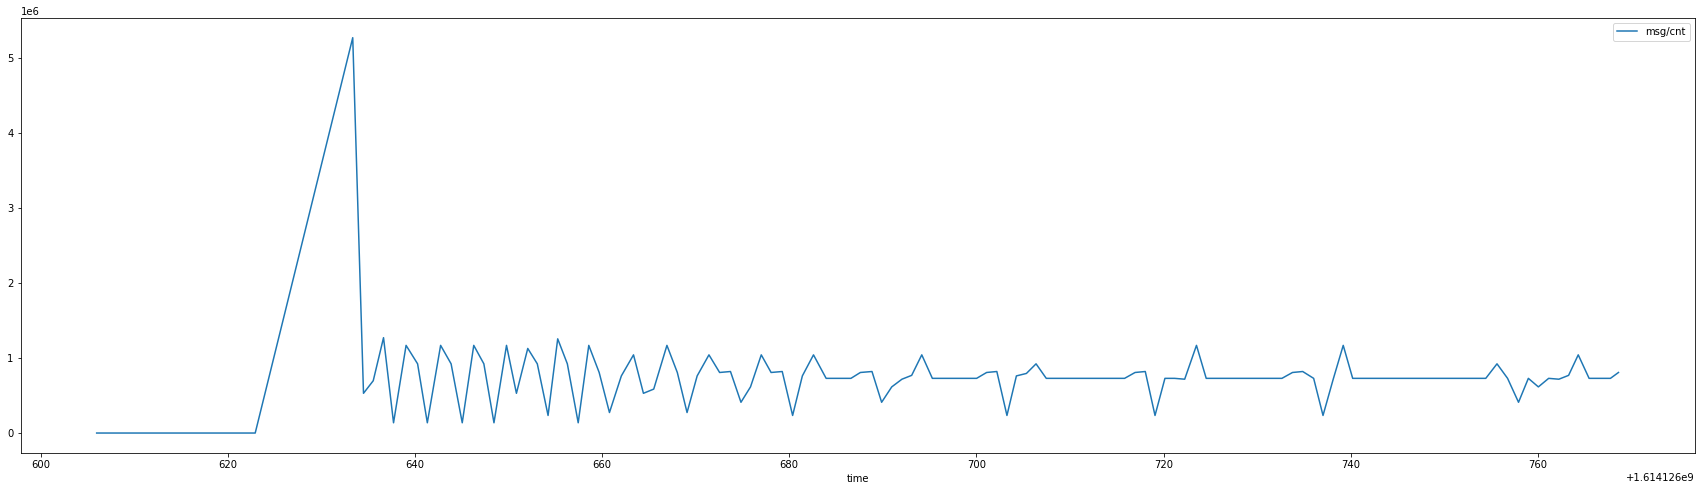

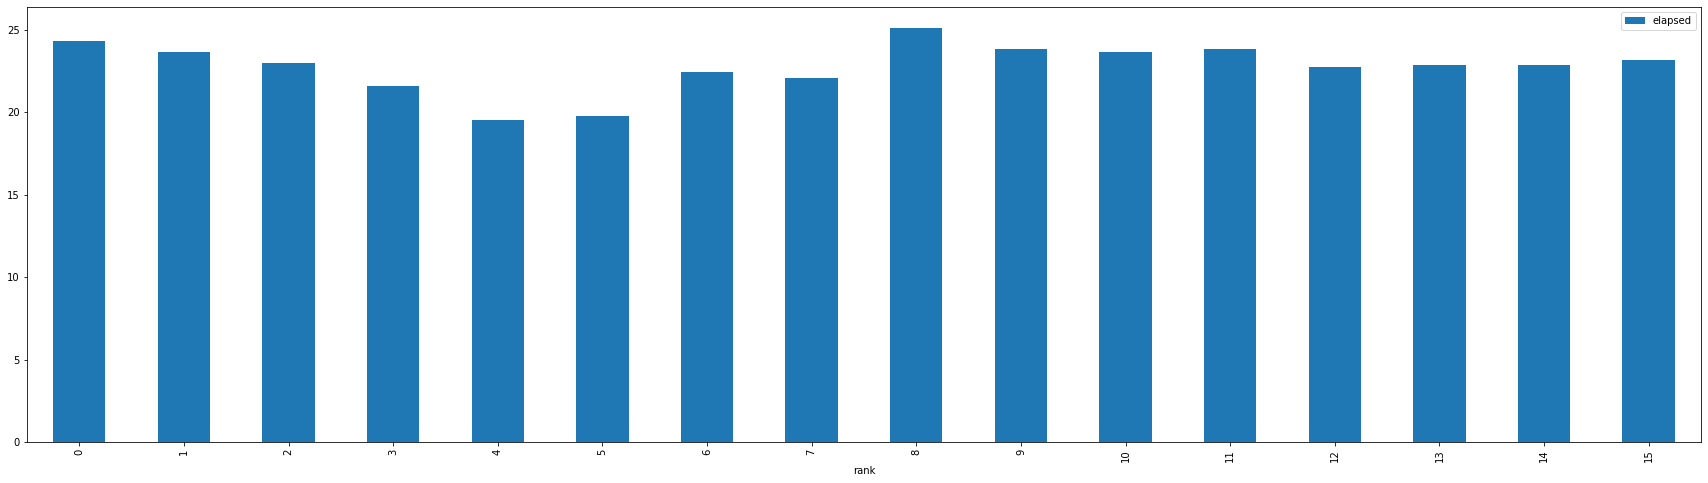

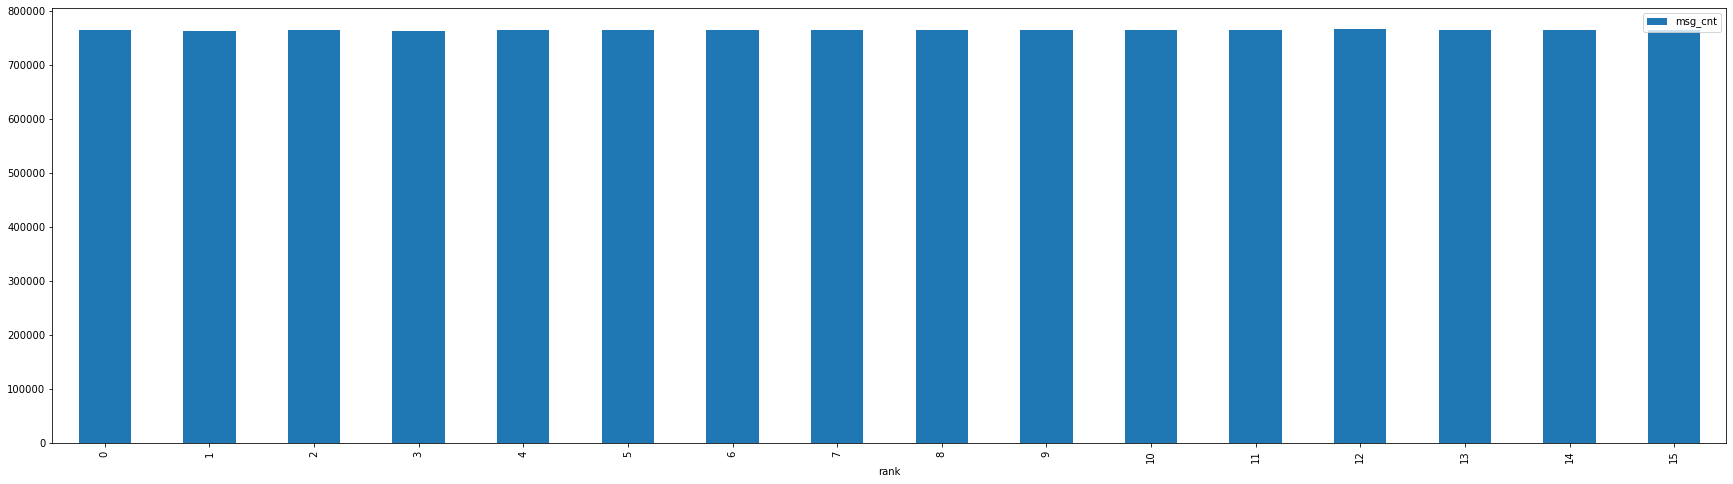

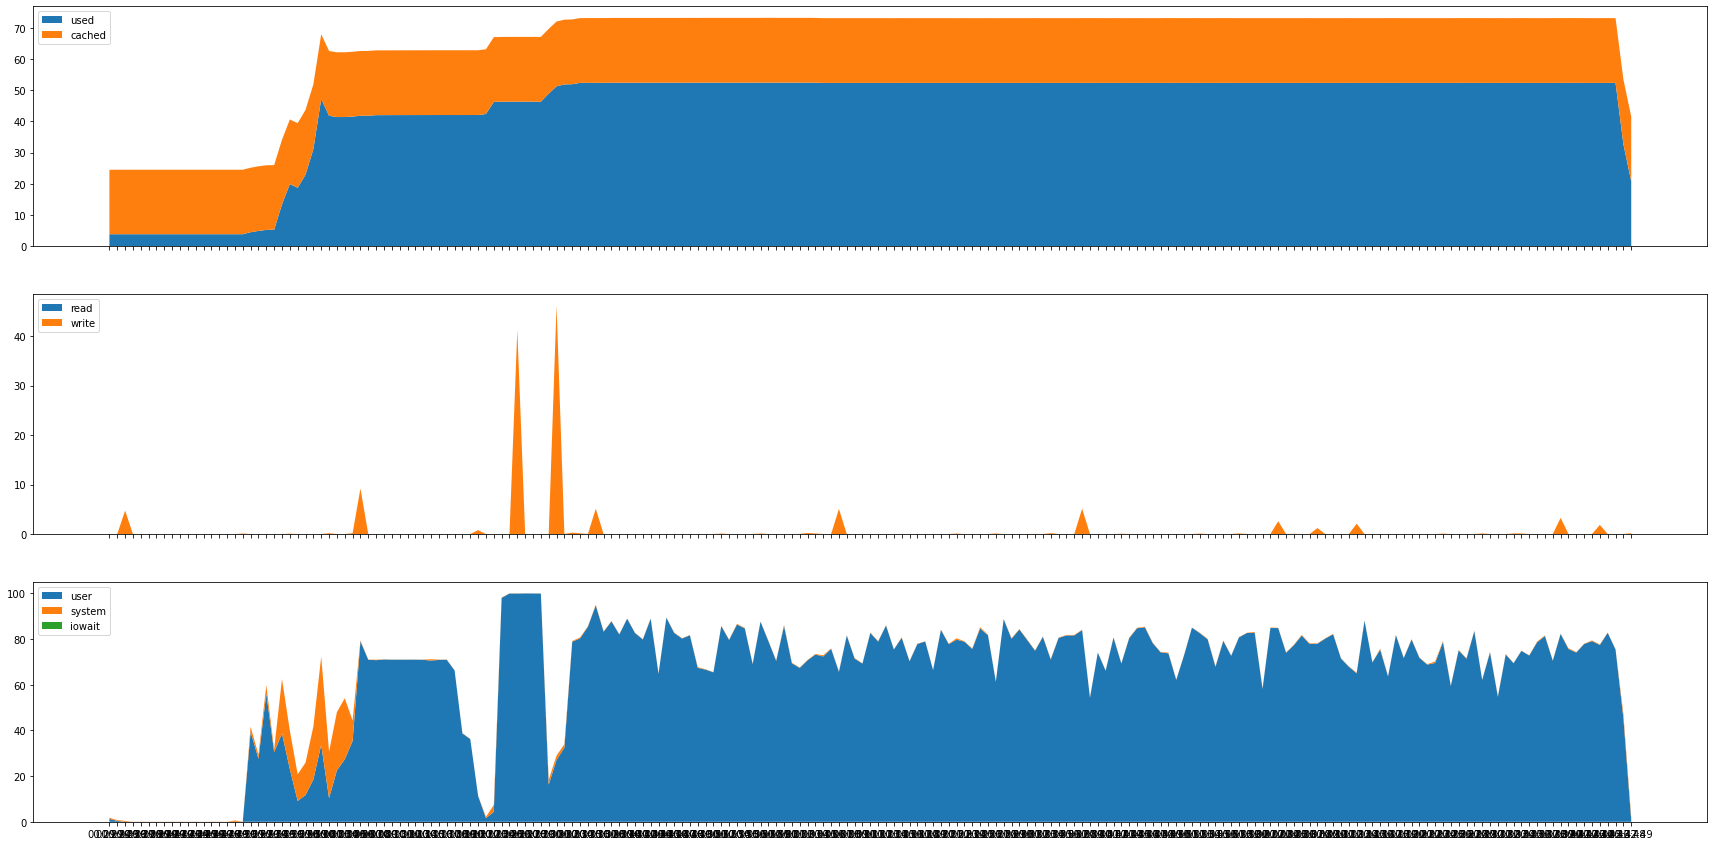

In [43]:
nodes=len(clients)
executors_per_node=int(2*8/nodes)
cores_per_executor=24

cache_size=75*8
total_size=90000*int(8/nodes)

params = {'labelCol': "label",  #"label"
          'numRound': 100,
          'treeMethod': 'hist',
          'growPolicy': 'depthwise',  
          'singlePrecisionHistogram':True,
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
#        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/HiBench606Mx50.dataframe.float.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

# mortgage on 2 nodes

executor per node: 2
parallelism: 384
memory: 5576m
offheap:38400m
172.31.61.15 : 2   12585	12479
172.31.53.191 : 2   11910	11911
172.31.49.204 : 2   11073	11074
172.31.61.221 : 2   14228	14159
172.31.57.201 : 2   12049	11960
172.31.54.28 : 2   11959	12028
172.31.54.196 : 2   11706	11707
172.31.63.132 : 2   12032	12031
Start time : 15895.616894901


/home/sparkuser
21/02/24 00:54:46 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614125714819_0007/jobs
http://sr525:28080/history/application_1614125714819_0007/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614125714819_0007.json
application_1614125714819_0007


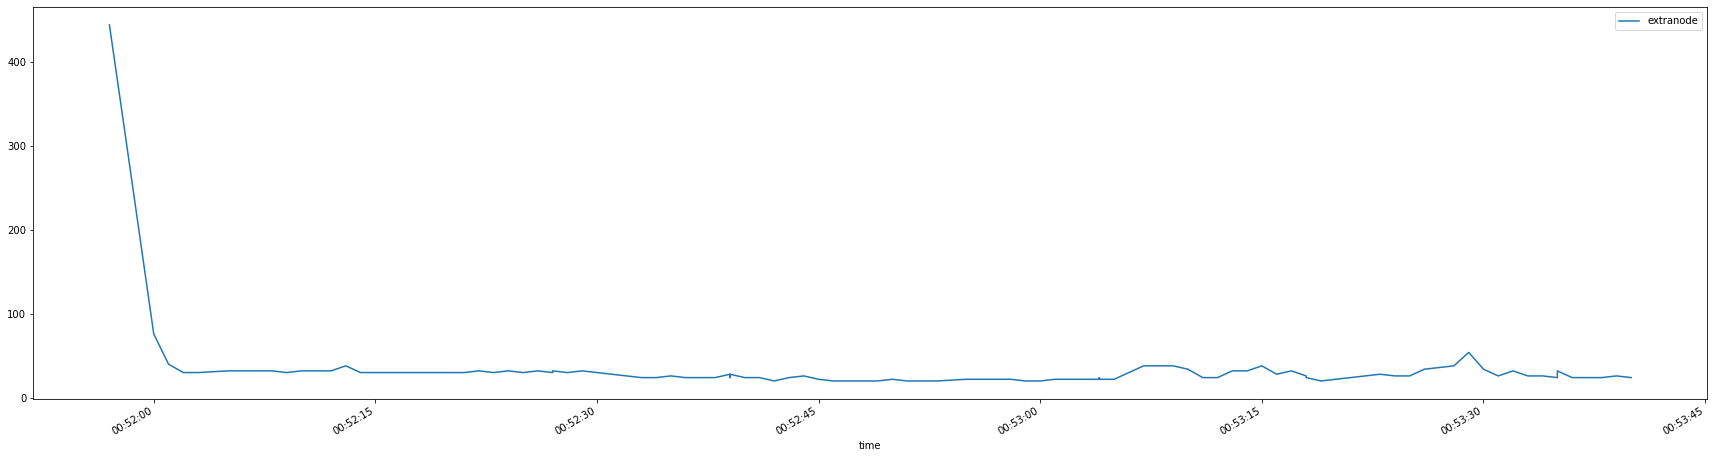

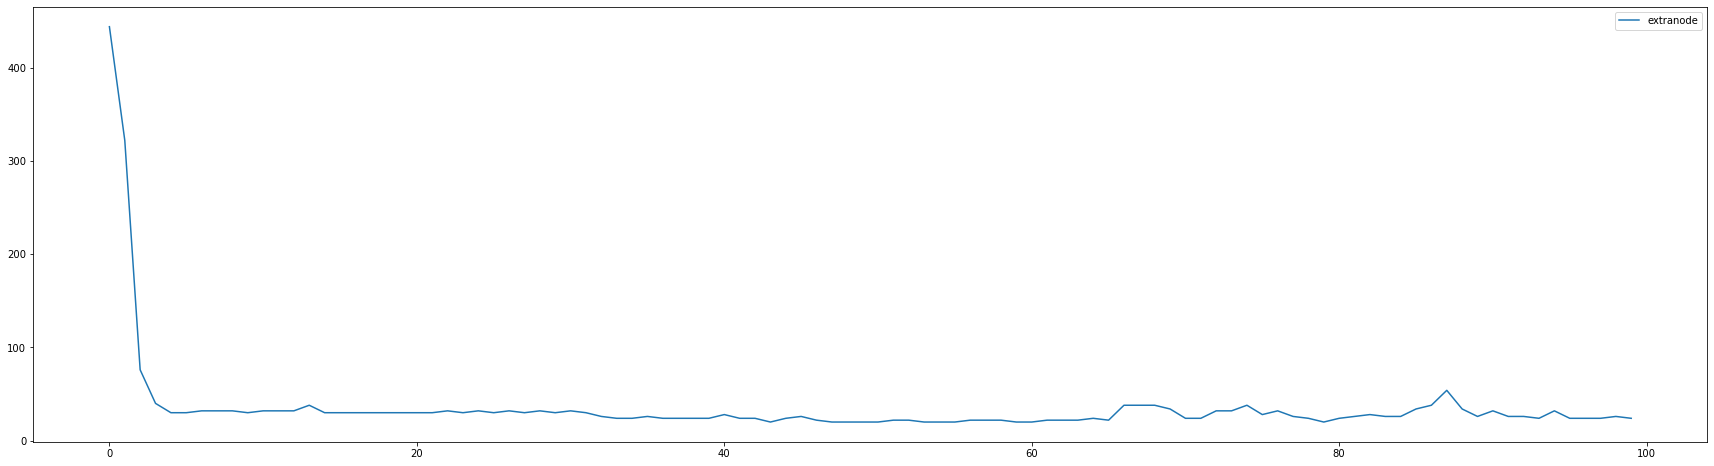

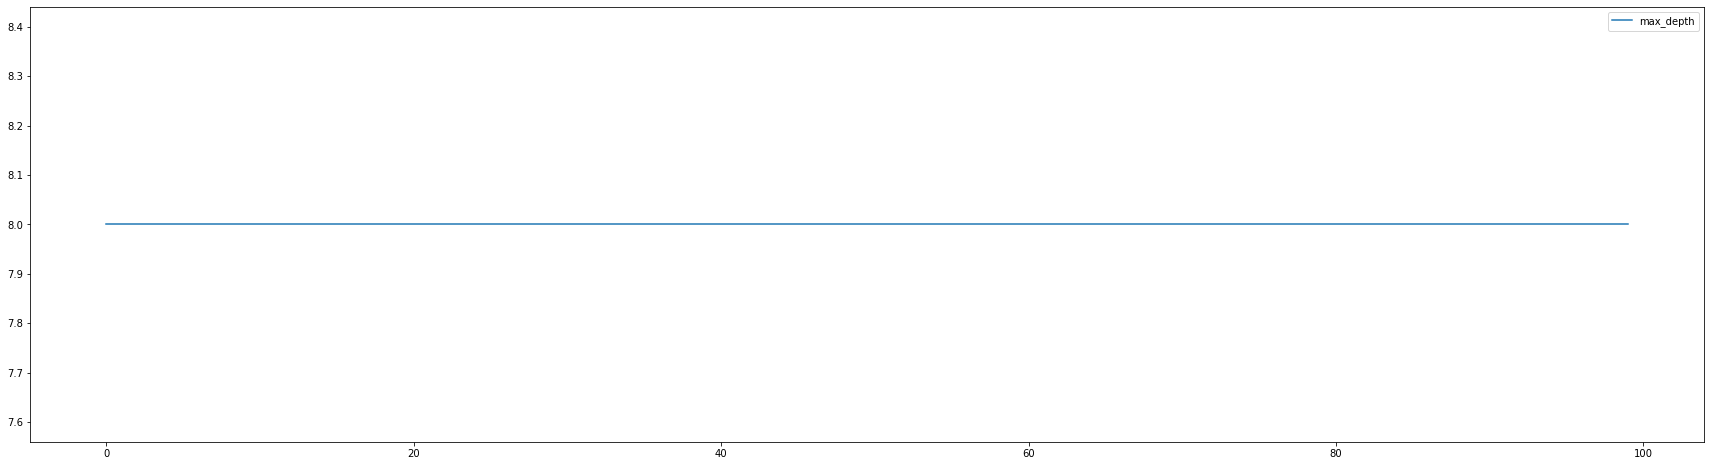

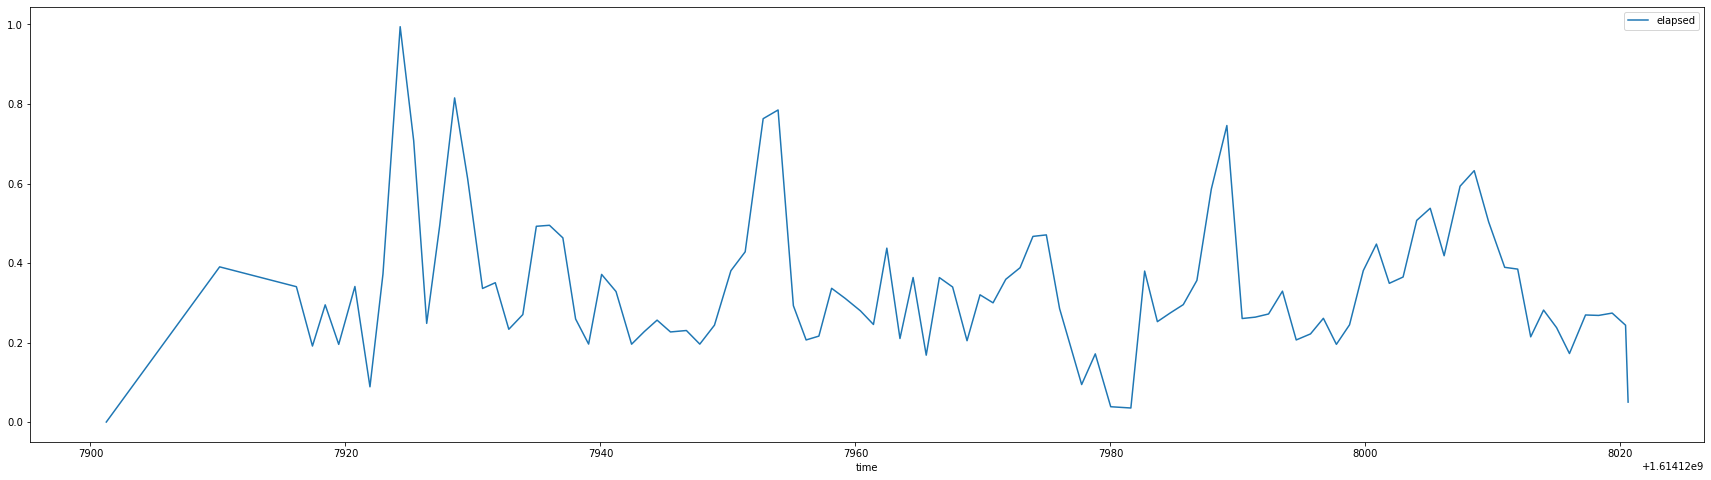

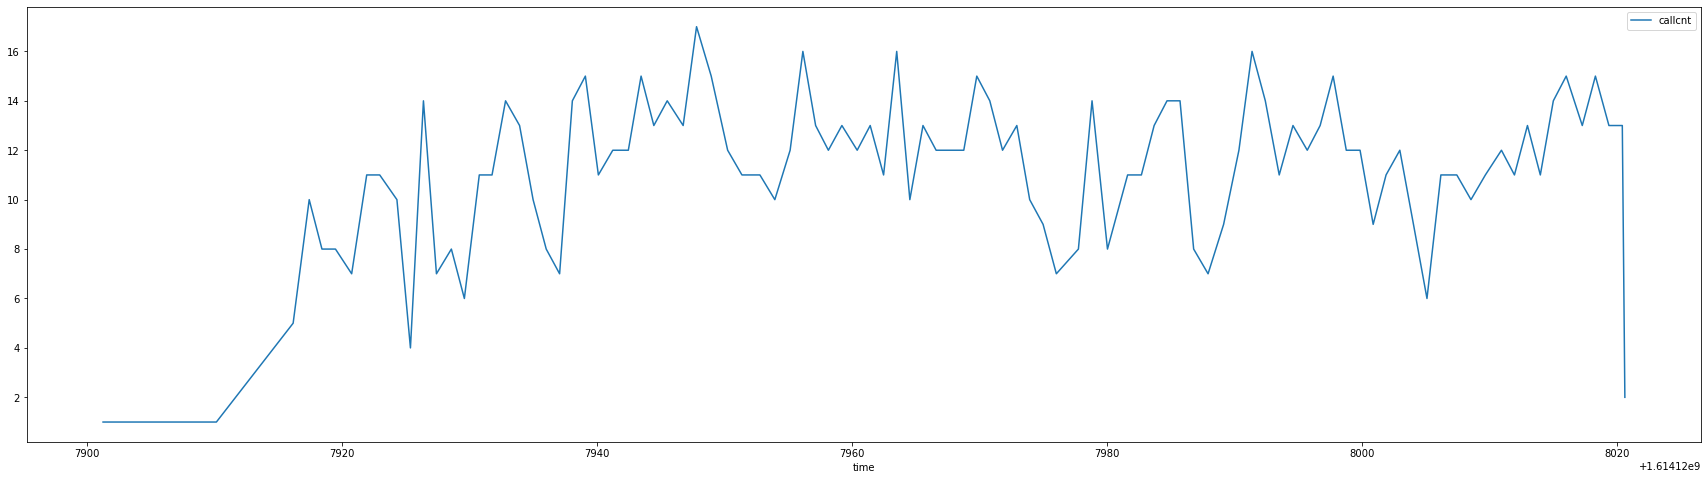

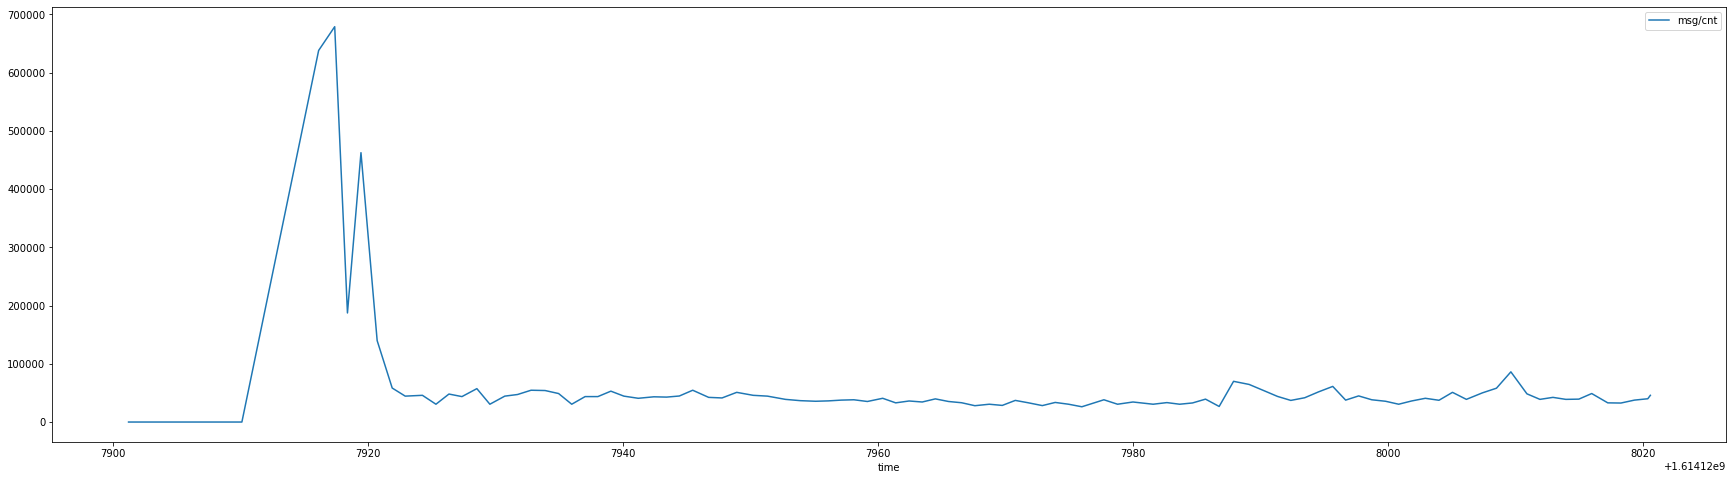

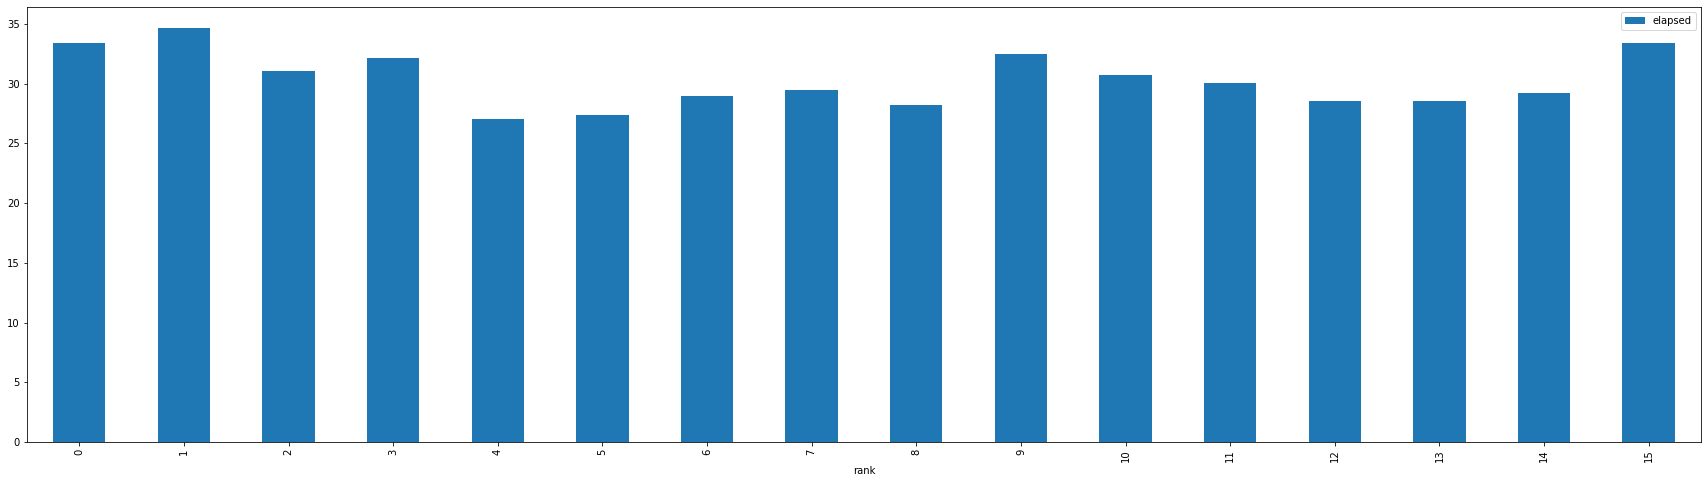

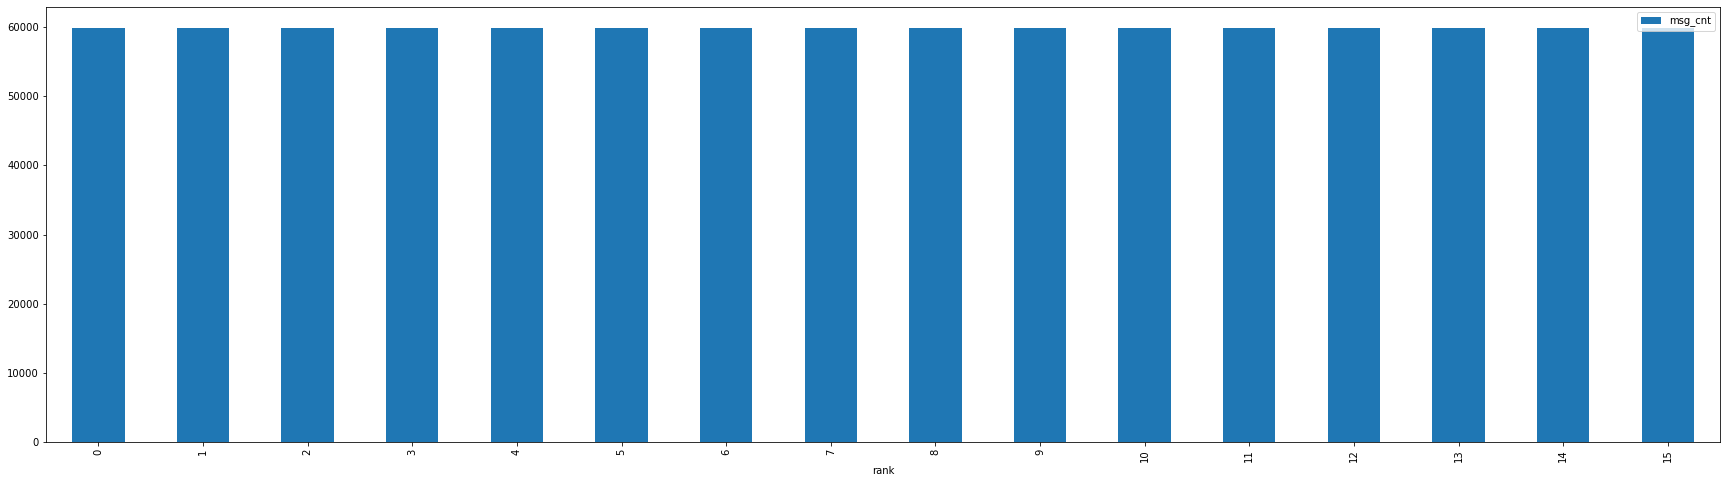

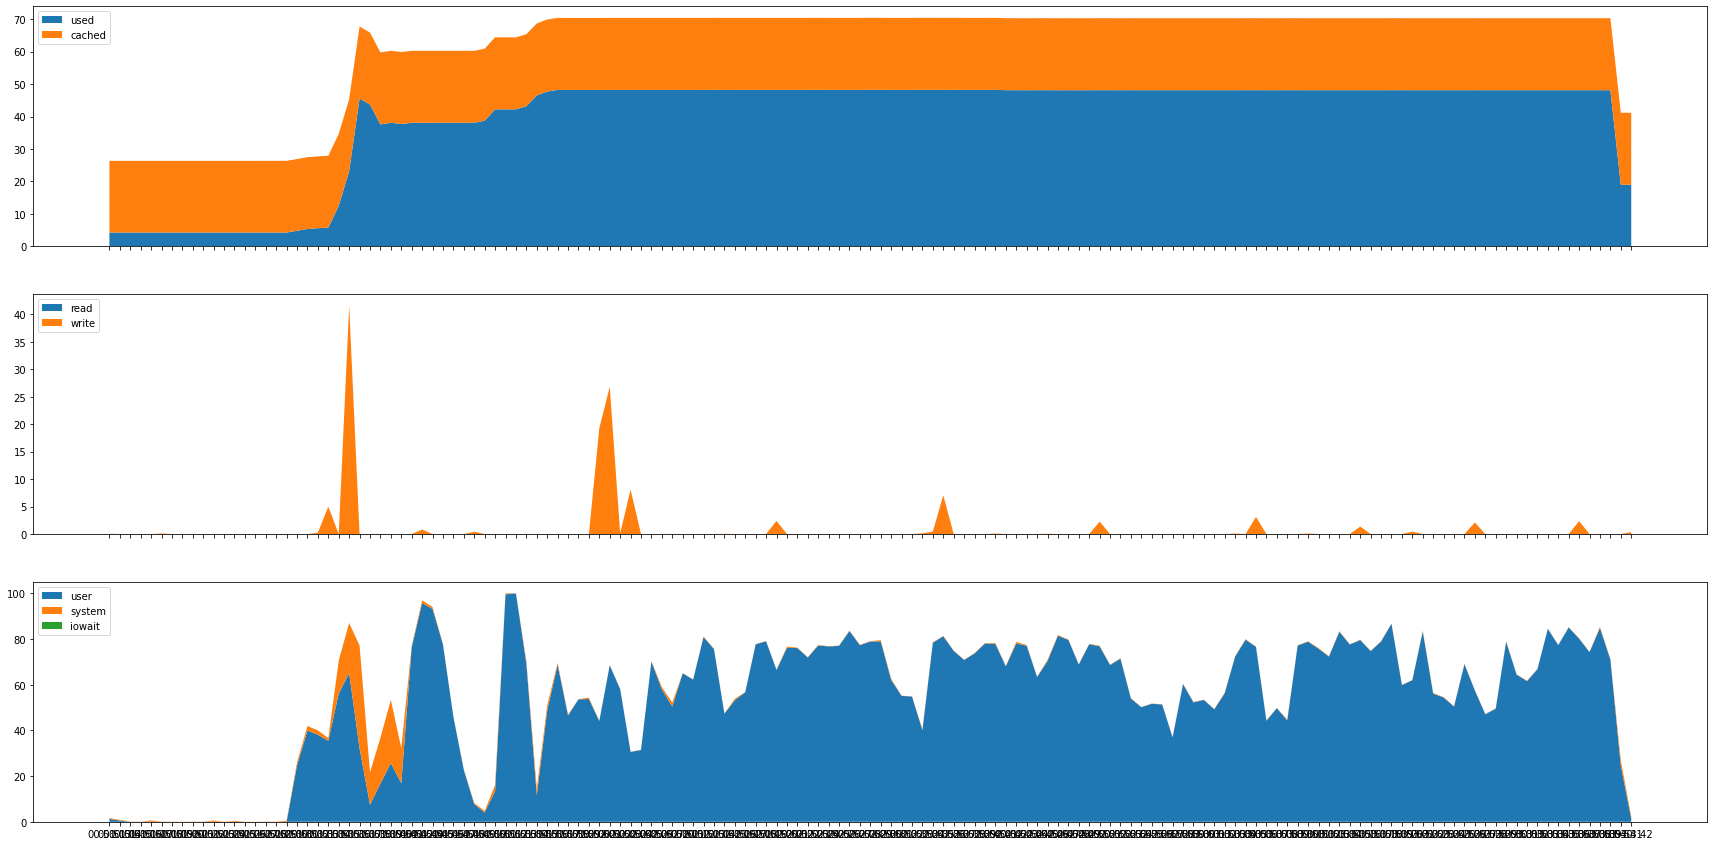

In [49]:
nodes=len(clients)
executors_per_node=2*int(8/nodes)
cores_per_executor=24

cache_size=75*8
total_size=90000*int(8/nodes)
    

params = {'labelCol': "delinquency_12",  #"label"
          'numRound': 100,
          'maxDepth': 8,
          'maxLeaves': 256,
          'maxBin': 256,
          'alpha': 0.9,
          'eta': 0.1,
          'gamma': 0.1,
          'subsample': 1.0,
          'reg_lambda': 1.0,
          'scalePosWeight': 2.0,
          'minChildWeight': 30.0,
          'treeMethod': 'hist',
          'objective': 'reg:squarederror', #if xgboost v0.82 needs to use 'reg:linear'. If >= 0.9, uses squarederror
          'growPolicy': 'depthwise',  
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'singlePrecisionHistogram':True,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/xgboost_36_files_float.dataframe.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()

executor per node: 2
parallelism: 384
memory: 5576m
offheap:38400m
172.31.61.15 : 2   16375	16478
172.31.53.191 : 2   15608	15677
172.31.49.204 : 2   14789	14742
172.31.61.221 : 2   17876	17945
172.31.57.201 : 2   15611	15612
172.31.54.28 : 2   15668	15669
172.31.54.196 : 2   15425	15356
172.31.63.132 : 2   15715	15716
Start time : 16296.053273535


/home/sparkuser
21/02/24 01:01:26 WARN hdfs.DFSClient: DFSInputStream has been closed already
http://localhost:28080/history/application_1614125714819_0008/jobs
http://sr525:28080/history/application_1614125714819_0008/jobs
http://sr525:1088/tracing_examples/trace_viewer.html#/tracing/test_data/application_1614125714819_0008.json
application_1614125714819_0008


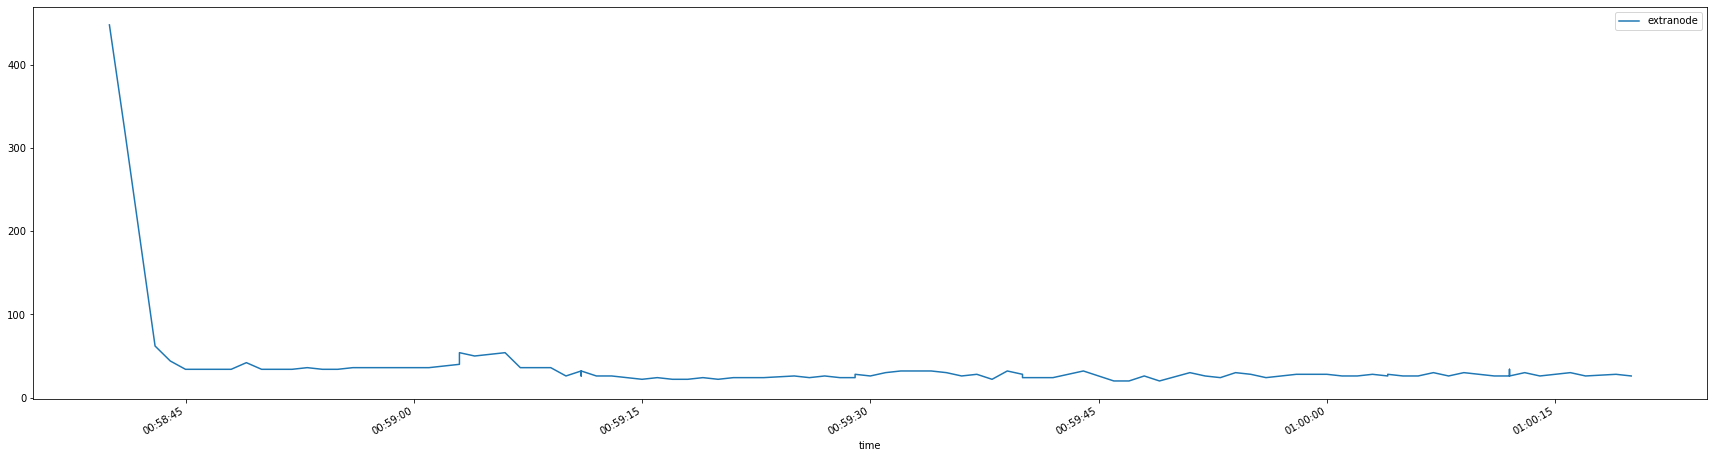

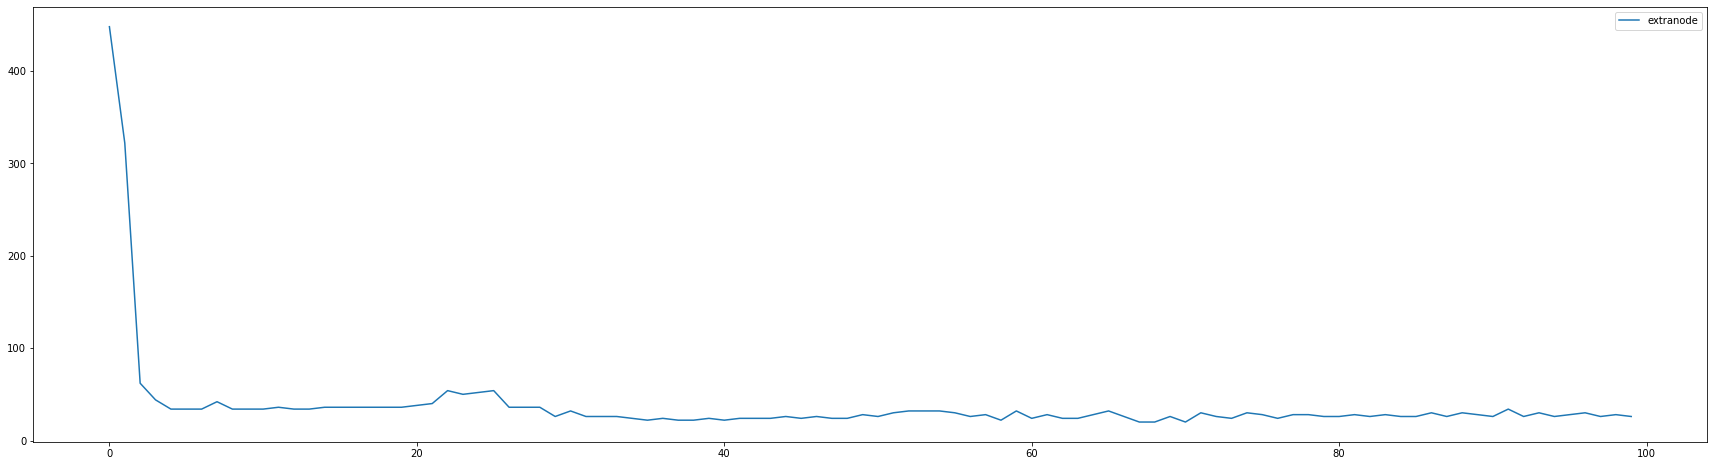

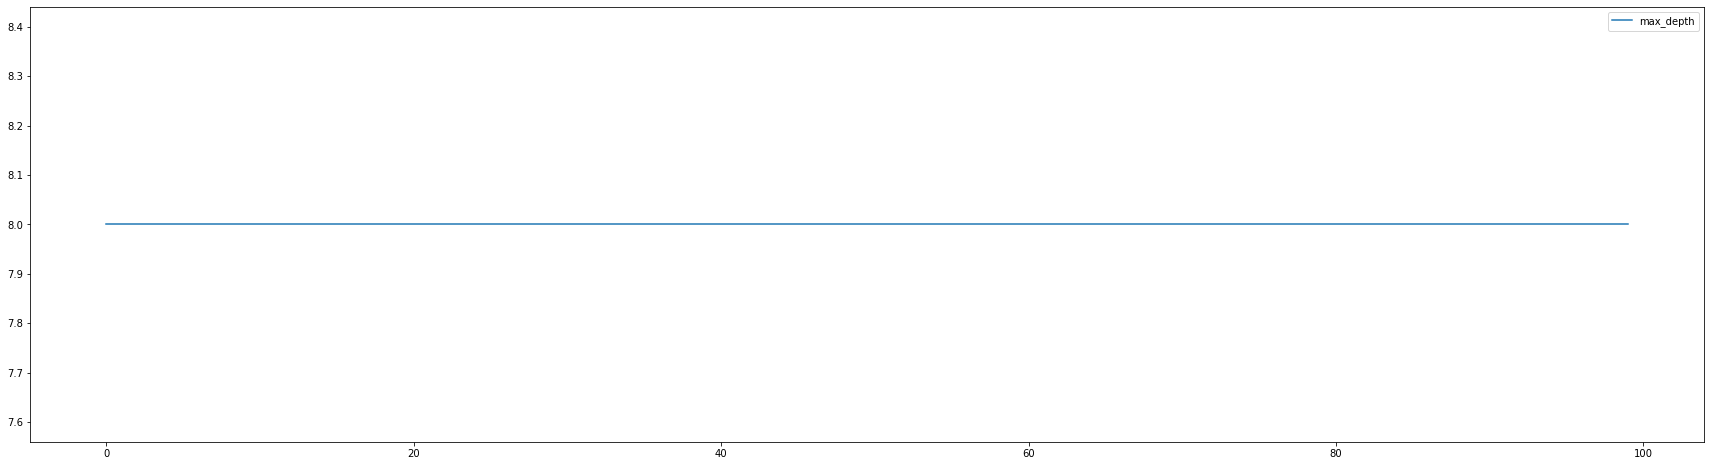

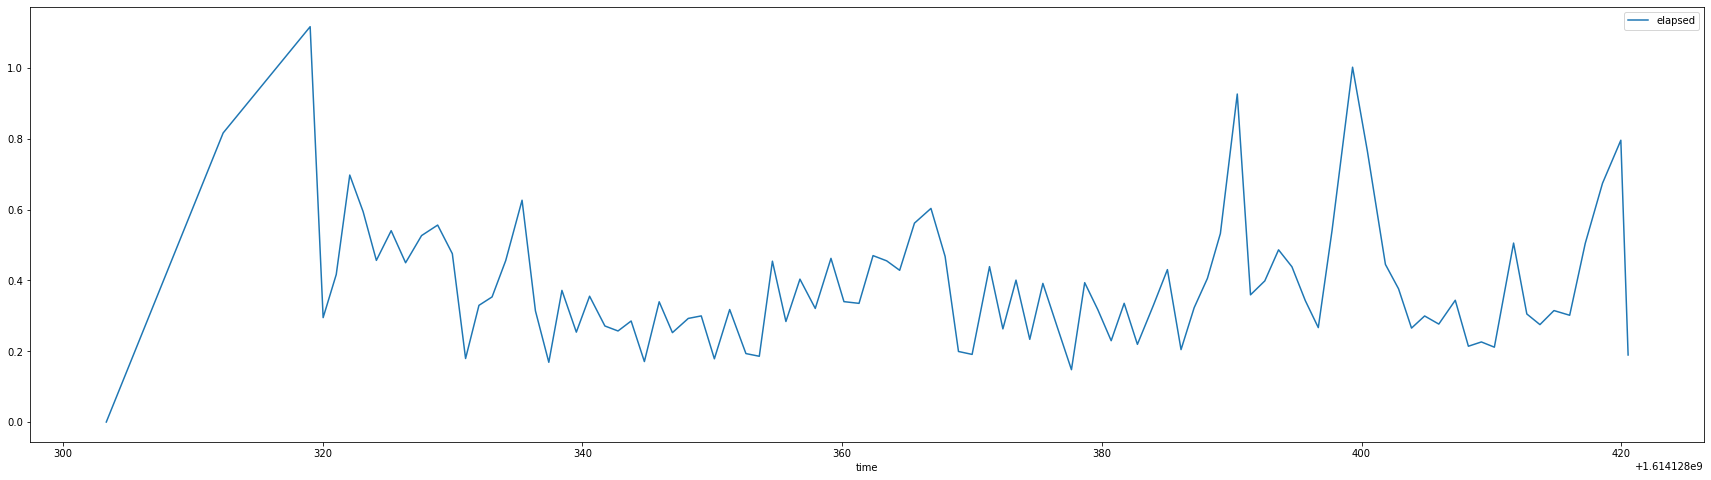

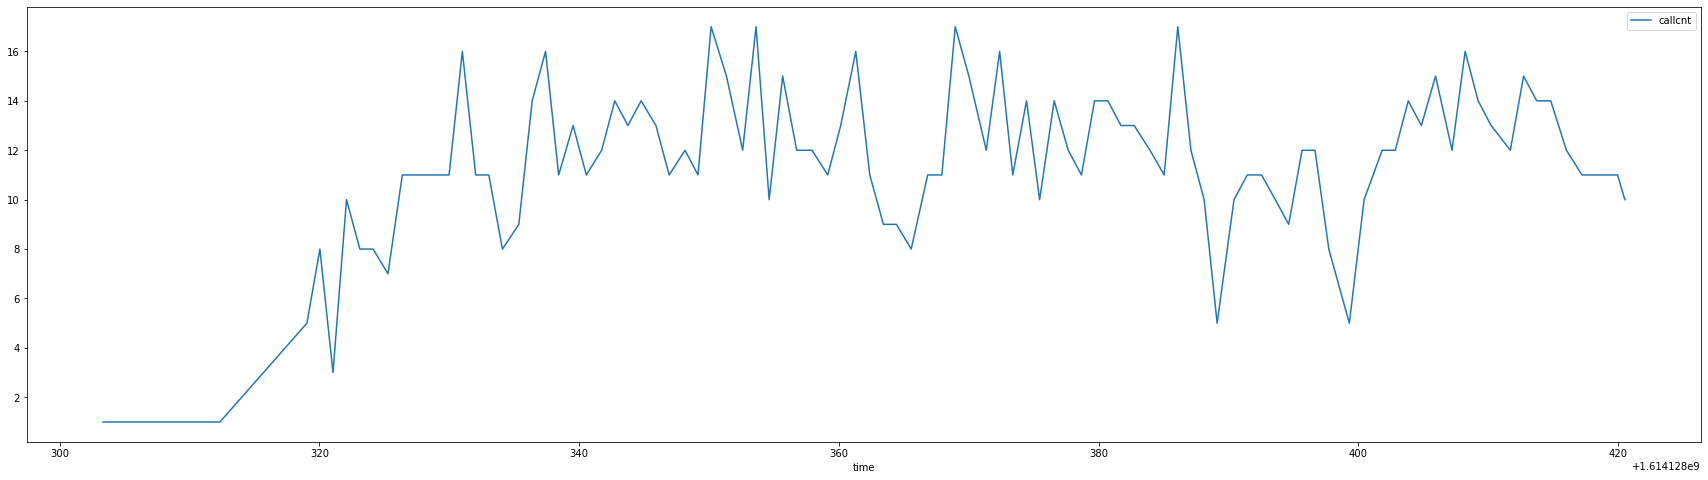

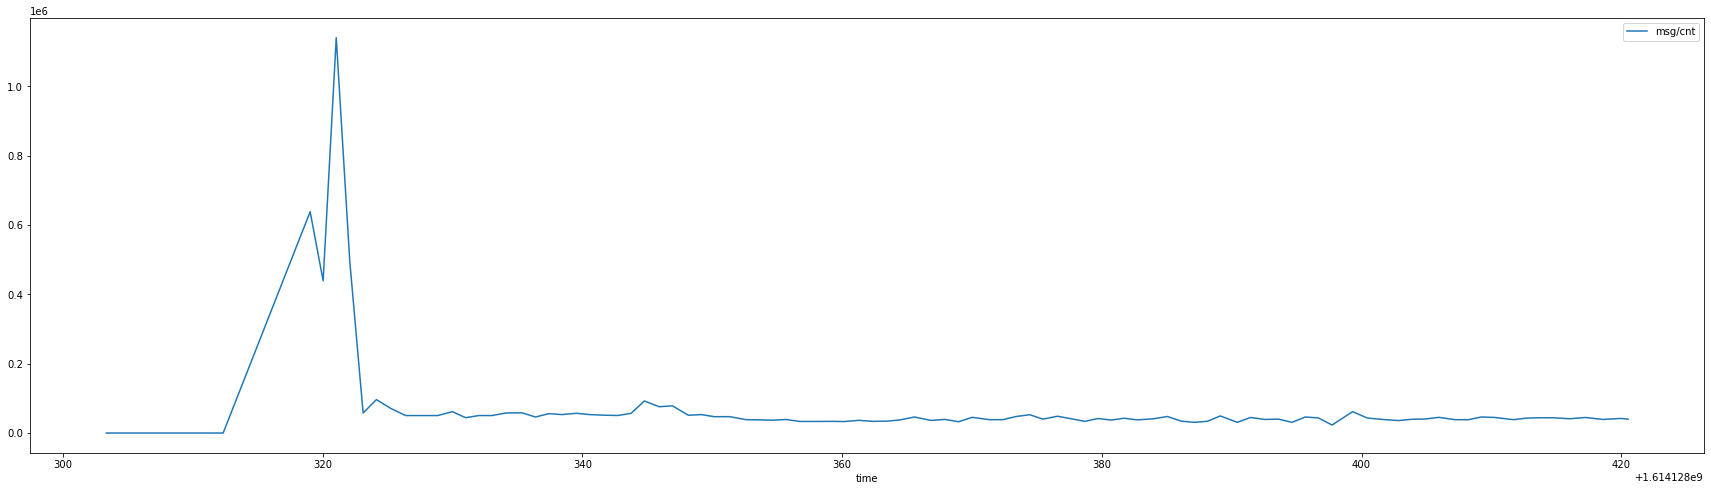

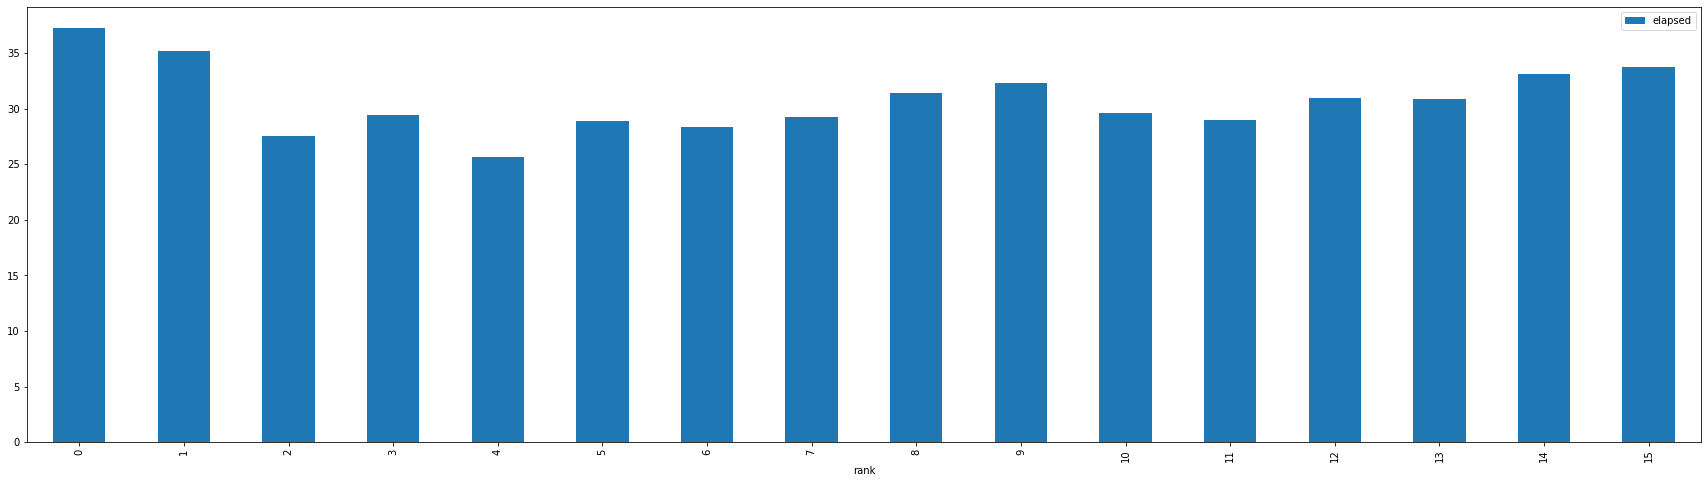

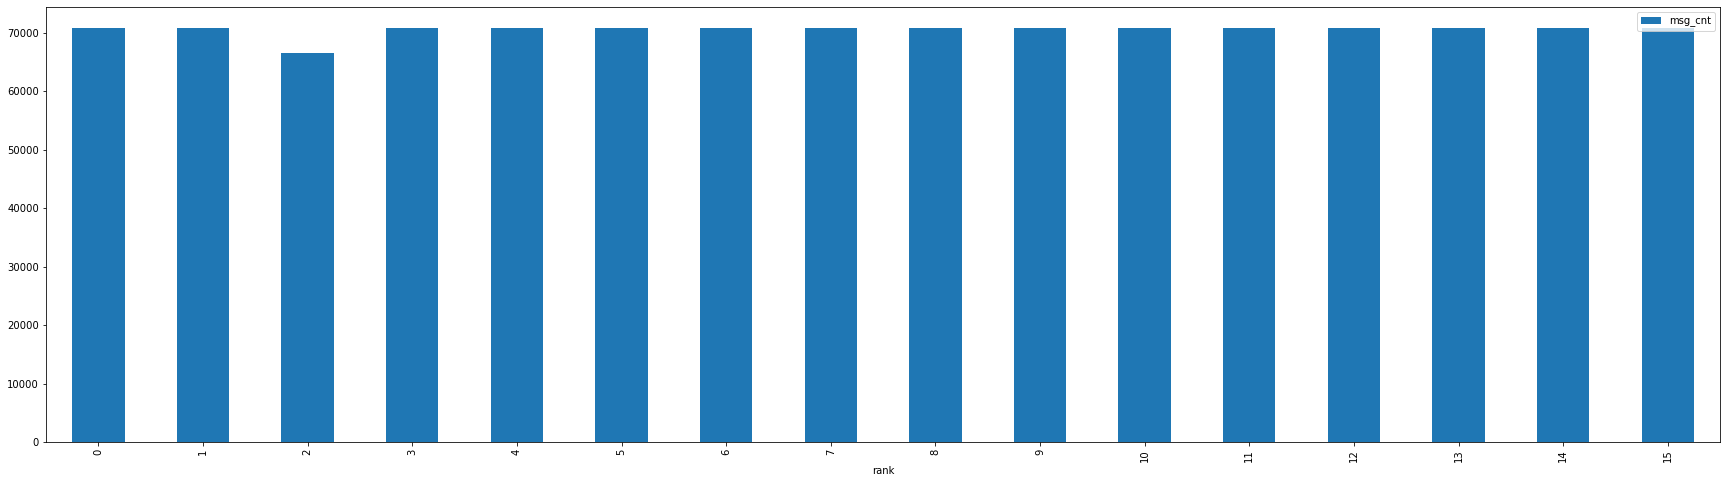

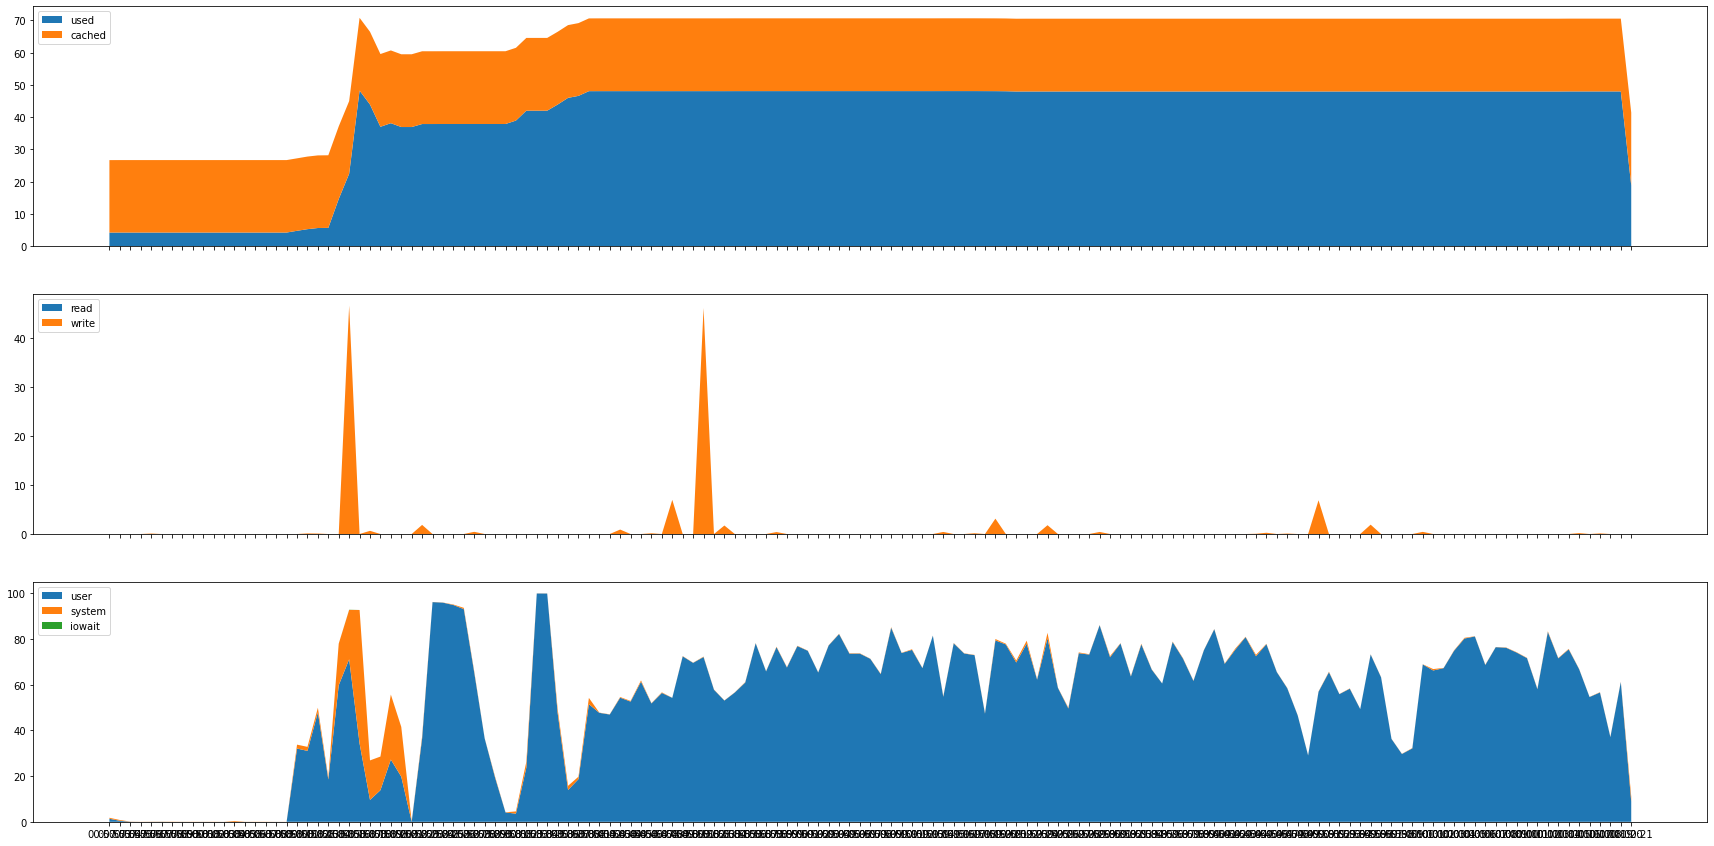

In [50]:
nodes=len(clients)
executors_per_node=2*int(8/nodes)
cores_per_executor=24

cache_size=75*8
total_size=90000*int(8/nodes)
    

params = {'labelCol': "delinquency_12",  #"label"
          'numRound': 100,
          'maxDepth': 8,
          'maxLeaves': 256,
          'maxBin': 256,
          'alpha': 0.9,
          'eta': 0.1,
          'gamma': 0.1,
          'subsample': 1.0,
          'reg_lambda': 1.0,
          'scalePosWeight': 2.0,
          'minChildWeight': 30.0,
          'treeMethod': 'hist',
          'objective': 'reg:squarederror', #if xgboost v0.82 needs to use 'reg:linear'. If >= 0.9, uses squarederror
          'growPolicy': 'depthwise',  
          'numWorkers': executors_per_node*nodes,
          'nthread':cores_per_executor,
          'singlePrecisionHistogram':True,
          'verbosity':3
}

for r in range(0,1):
#    dropcache(clients)
    
    sc, spark=create_cntx(nodes, executors_per_node, cores_per_executor, "xgboost_bigdata_release")
    appid = sc.applicationId
    try:
        pinexecutor(clients)
        startmonitor(clients, appid, collect_emon=True)
        t1 = timeit.default_timer()
        df = spark.read.format('arrow').load("/xgboost_36_files_float.dataframe.parquet.8x96")
        model, train_time  = run_train(df, params)
        t2 = timeit.default_timer()
        stopmonitor(clients, sc, appid)
        trainingtime = gettrainingtime(clients, appid)
        display(HTML(('End 2 end. Time(sec): <font size=6pt color=red>{:f}</font>'.format(t2-t1))))
        plotresult(clients[0], appid, params['numRound'])
        draw_allreduce(appid)
        draw_sar(appid)
    finally:
        killsar(clients)
        sc.stop()